In [1]:
#importing necessary python packages
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from math import sqrt
import os

In [2]:
os.chdir('C:\\Users\\U0033207PC\\Desktop\\LUAD FIREHOSE LEGACY DATABASE')#setting the right directory

In [3]:
# Importing the dataset
dt = pd.read_excel('GENES.xlsx')

In [4]:
dt.head(2)

,Hugo_Symbol,UBE2Q2P2,SSX9,CXORF67,EFCAB8,SDR16C6P,EFCAB12,A1BG,A1CF,RBFOX1,...,SLU7,SLURP1,SMAD2,SMAD3,SMAD4,SMAD5,SMAD6,SMAD7,Patient's Vital Status,Overall Survival (Months)
0,TCGA-05-4244-01,-0.4238,-0.1379,-0.1805,0.4529,-0.3317,-0.1012,-0.6977,-0.1476,-0.224,...,3.4584,-0.2752,-0.7736,-0.6896,-0.0017,0.1779,-0.6433,0.7445,1,0.00
1,TCGA-05-4249-01,-0.3291,-0.1379,-0.1805,-0.0869,-0.3317,-0.1661,-0.1483,-0.1371,-0.226,...,0.7962,-0.2752,-0.6214,0.0881,1.3829,2.3203,-0.4918,0.0368,1,50.03


In [5]:
dc = "Overall Survival (Months)"; 
ec = "Patient\'s Vital Status"

dt_ = dt.drop('Hugo_Symbol', axis=1)

y = dt_.pop(dc).values
z1 = dt_.pop(ec).values
X = dt_

In [6]:
dt.head(2)

,Hugo_Symbol,UBE2Q2P2,SSX9,CXORF67,EFCAB8,SDR16C6P,EFCAB12,A1BG,A1CF,RBFOX1,...,SLU7,SLURP1,SMAD2,SMAD3,SMAD4,SMAD5,SMAD6,SMAD7,Patient's Vital Status,Overall Survival (Months)
0,TCGA-05-4244-01,-0.4238,-0.1379,-0.1805,0.4529,-0.3317,-0.1012,-0.6977,-0.1476,-0.224,...,3.4584,-0.2752,-0.7736,-0.6896,-0.0017,0.1779,-0.6433,0.7445,1,0.00
1,TCGA-05-4249-01,-0.3291,-0.1379,-0.1805,-0.0869,-0.3317,-0.1661,-0.1483,-0.1371,-0.226,...,0.7962,-0.2752,-0.6214,0.0881,1.3829,2.3203,-0.4918,0.0368,1,50.03


In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, z1_train, z1_test = train_test_split(X, y, z1, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, z1_train, z1_val = train_test_split(X_train, y_train, z1_train, test_size=0.2, random_state=0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

In [9]:
# Create a random forest Regressor
rgr = RandomForestRegressor(n_estimators=100, random_state=0)

In [10]:
# Train the Regressor
rgr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [11]:
# Print the name and importance of each feature
for feature in zip(X.columns, rgr.feature_importances_):
    print(feature)

('UBE2Q2P2', 3.659081028318591e-07)
('SSX9', 0.0)
('CXORF67', 0.0)
('EFCAB8', 0.00046819860605826344)
('SDR16C6P', 0.0)
('EFCAB12', 1.963784587942501e-06)
('A1BG', 0.00018504226617252226)
('A1CF', 4.0917054575588784e-08)
('RBFOX1', 5.384807810047107e-05)
('GGACT', 0.00014960150722245863)
('A2ML1', 0.0)
('A2M', 1.675172288636659e-09)
('A4GALT', 6.560049437698225e-05)
('A4GNT', 2.411318037597077e-07)
('AAAS', 1.623860372025042e-05)
('AACSP1', 4.4538938736269666e-05)
('AACS', 0.0001251108809951955)
('AADACL2', 0.00010578754637917516)
('AADACL3', 0.0)
('AADACL4', 0.0)
('AADAC', 3.917748418389328e-08)
('AAGAB', 5.180382978579433e-07)
('AAK1', 0.0)
('AAMP', 0.0)
('AANAT', 1.6316787601361427e-09)
('AARS2', 2.27683200689356e-09)
('AARSD1', 0.0)
('AARS', 5.7525297068729e-05)
('AASDHPPT', 0.0)
('AASDH', 0.0)
('AASS', 0.0)
('AATF', 2.378187856007412e-06)
('AATK', 3.6290639303619663e-07)
('ABAT', 0.0017916338078723532)
('ABCA10', 0.0)
('ABCA11P', 2.267956321558366e-06)
('ABCA12', 0.0)
('ABCA13', 2

('C10ORF67', 1.234295200496429e-06)
('C10ORF71', 1.3023735073973026e-08)
('VSTM4', 1.7181095639477027e-08)
('OLMALINC', 9.326067981805443e-08)
('C10ORF76', 6.933498539927382e-07)
('SFR1', 2.859352245076376e-05)
('CFAP43', 0.0)
('PLEKHS1', 2.3499985862544765e-11)
('C10ORF82', 4.2741903423823045e-09)
('FAM204A', 1.899124881006666e-06)
('C10ORF88', 0.00024009458674949192)
('C10ORF90', 1.9478997882016886e-07)
('C10ORF91', 1.3391539220908446e-07)
('C10ORF95', 2.3171957047830904e-07)
('CCDC172', 0.0)
('C10ORF99', 5.405368482341461e-07)
('TMEM258', 1.0450494326701312e-08)
('C11ORF16', 2.9424724513317204e-06)
('AKIP1', 0.00013035935669063873)
('C11ORF1', 2.179206814112329e-06)
('TEX40', 3.407518444370177e-05)
('C11ORF21', 0.0)
('C11ORF24', 1.5104757940210907e-06)
('VPS51', 9.347629939031069e-05)
('C11ORF30', 0.0)
('C11ORF31', 5.41095140234082e-06)
('PLET1', 7.000585013981635e-05)
('LMNTD2', 0.0007380166767112516)
('KIAA1549L', 0.0)
('C11ORF42', 3.70411359748167e-08)
('C11ORF45', 0.0)
('ARL14EP

('CDK20', 6.343495134552806e-09)
('CDK2AP1', 5.7609470659944244e-06)
('CDK2AP2', 2.5356493118379537e-05)
('CDK2', 7.898419567548134e-06)
('CDK3', 4.558936462106735e-07)
('CDK4', 3.206387693823626e-08)
('CDK5R1', 1.4594454313001068e-06)
('CDK5R2', 7.674222846398287e-05)
('CDK5RAP1', 0.0)
('CDK5RAP2', 4.864700326202669e-09)
('CDK5RAP3', 5.145154295891004e-06)
('CDK5', 1.5079201273300757e-06)
('CDK6', 3.1175292940617624e-05)
('CDK7', 7.76388349090277e-09)
('CDK8', 0.0)
('CDK9', 9.281933967677234e-07)
('CDKAL1', 0.0)
('CDKL1', 3.261901295736664e-05)
('CDKL2', 6.181916262478285e-07)
('CDKL3', 9.381095876255779e-07)
('CDKL4', 0.0)
('CDKL5', 2.989243661193202e-06)
('CDKN1A', 6.096546102438935e-09)
('CDKN1B', 0.0)
('CDKN1C', 2.8214746521523804e-07)
('CDKN2AIPNL', 1.3379111813477884e-07)
('CDKN2AIP', 0.0)
('CDKN2A', 8.702586671967556e-05)
('CDKN2B', 0.0006585888702107255)
('CDKN2C', 0.002643597986851099)
('CDKN2D', 4.836647672613728e-07)
('CDKN3', 0.0)
('CDNF', 8.870026659860833e-07)
('CDO1', 6

('COMMD8', 0.0)
('COMMD9', 1.544293300730447e-07)
('COMP', 0.0005680828009494542)
('COMTD1', 5.274158436576842e-05)
('COMT', 0.0)
('COPA', 0.0)
('COPB1', 1.5517927880205054e-08)
('COPB2', 3.1913869456308763e-11)
('COPE', 7.298974540256493e-06)
('COPG2', 4.4387734352949017e-07)
('COPS2', 4.827173508778747e-07)
('COPS3', 1.8076519995808315e-07)
('COPS4', 0.0)
('COPS5', 0.0)
('COPS6', 2.485964333432461e-07)
('COPS7A', 0.0)
('COPS7B', 0.0011082311376170299)
('COPS8', 0.0)
('COPZ2', 0.000142781423923776)
('COQ10A', 8.663183536608641e-08)
('COQ10B', 0.0)
('COQ2', 0.00027860768394512287)
('COQ3', 1.3189454354484007e-08)
('COQ4', 4.4683599740755314e-10)
('COQ5', 7.882784613482908e-09)
('COQ6', 1.4641873081098632e-06)
('COQ7', 3.0970213908340813e-07)
('COQ9', 5.07873355776058e-07)
('CORIN', 4.4821225033959135e-05)
('CORO1A', 0.0)
('CORO1B', 0.0)
('CORO1C', 2.997408294841804e-07)
('CORO2A', 0.0)
('CORO2B', 0.00010768252878505623)
('CORO6', 8.539039733561598e-10)
('CORO7', 0.0)
('CORT', 8.2895510

('ELFN2', 1.8193665740645194e-10)
('ELK1', 0.0)
('ELK3', 0.0)
('ELK4', 9.893801315863571e-11)
('ELL2', 0.00020598103056702357)
('ELL3', 3.0083718489997282e-06)
('ELL', 0.0)
('ELMO1', 5.92367779024032e-07)
('ELMO2', 3.048634577692777e-05)
('ELMO3', 0.00013778194802872056)
('ELMOD1', 1.479114344619197e-08)
('ELMOD2', 0.0)
('ELMOD3', 6.088282905567707e-06)
('ELN', 9.239218264159322e-06)
('ELOF1', 4.905409915960763e-06)
('ELOVL1', 4.961520234011186e-09)
('ELOVL2', 2.385839305973032e-06)
('ELOVL3', 2.8605665218191577e-06)
('ELOVL4', 2.974838635703044e-07)
('ELOVL5', 0.0)
('ELOVL6', 0.0)
('ELOVL7', 0.00047209623778267254)
('DBIL5P', 0.00010761523576185362)
('ELP2', 2.579121624223336e-08)
('ELP3', 6.7088717022296445e-06)
('ELP4', 3.4562290123987537e-07)
('ELSPBP1', 0.0)
('ADGRL4', 0.0)
('EMB', 3.3833378101382985e-08)
('EMCN', 6.116090875501047e-07)
('EMD', 5.123697566186425e-05)
('EME1', 3.214766499195553e-09)
('EME2', 4.659209543739828e-09)
('EMG1', 1.4450403559020773e-08)
('EMID1', 2.285807

('SMIM11', 0.0)
('FAM166A', 0.0)
('FAM166B', 0.0)
('FAM167A', 0.00010210659640522977)
('FAM167B', 7.182418430784518e-06)
('FAM168A', 5.6123279738561125e-06)
('FAM168B', 0.0)
('FAM169A', 1.8158782171756794e-06)
('FAM169B', 2.3831253195235374e-10)
('FAM170A', 0.00013013912535243775)
('FAM170B', 3.263047302191047e-05)
('FAM171A1', 1.472231918918038e-06)
('FAM171A2', 2.0026199064098834e-05)
('FAM171B', 1.1775660710706335e-07)
('FAM172A', 1.0880029758610678e-08)
('FAM173A', 9.207665228245745e-10)
('FAM173B', 1.3020377575770843e-05)
('FAM174A', 5.160430497524958e-05)
('FAM174B', 0.0)
('FAM175A', 0.0)
('FAM175B', 0.0005985285145520165)
('EVA1A', 1.401337060801746e-08)
('EVA1B', 5.772824066768547e-10)
('FAM177A1', 2.2482358616365735e-05)
('FAM177B', 3.523281074366101e-08)
('FAM178A', 0.0)
('FAM178B', 4.605757423391367e-05)
('FAM179A', 1.2403638923462471e-05)
('FAM179B', 9.464096506538179e-07)
('FAM180A', 6.25895073844157e-05)
('FAM180B', 0.0)
('FAM181A', 0.0)
('FAM181B', 0.0)
('FAM182A', 0.000

('HAUS4', 5.128845354456576e-07)
('HAUS5', 1.2584502328658796e-07)
('HAUS6', 1.598992196178297e-06)
('HAUS7', 9.093809321964683e-07)
('HAUS8', 1.2651946321802121e-08)
('HAVCR1', 3.1815216190400987e-06)
('HAVCR2', 2.7094506673169254e-09)
('HAX1', 0.0)
('HBA1', 0.001109684861360436)
('HBA2', 1.8857165836552045e-06)
('HBBP1', 0.0)
('HBB', 3.773058917719625e-05)
('HBE1', 9.92843205370579e-05)
('HBEGF', 1.5522742425486132e-06)
('HBG1', 3.309378183935366e-05)
('HBG2', 8.255454393994289e-08)
('HBP1', 0.0)
('HBQ1', 5.6580348114885636e-06)
('HBS1L', 4.594406600533252e-06)
('LAMTOR5', 3.0467801371849546e-08)
('HBZ', 2.295307800411355e-06)
('HCCS', 2.9615459339512522e-08)
('HCFC1R1', 1.1620525409622423e-05)
('HCFC1', 2.1380899081790086e-07)
('HCFC2', 0.0)
('HCG11', 0.0)
('HCG18', 6.289577553829033e-05)
('HCG22', 0.0025940969005199977)
('HCG27', 0.0008794495211893552)
('HCG9', 3.620533524230458e-06)
('HCK', 2.0323745396603174e-07)
('HCLS1', 0.0016583681508097348)
('HCN1', 0.0)
('HCN2', 0.0)
('HCN3

('HCCAT5', 0.0)
('HTN1', 0.0)
('HTN3', 0.0)
('HTR1A', 0.0)
('HTR1B', 1.2959127275414323e-05)
('HTR1D', 0.0)
('HTR1E', 5.976213445645351e-07)
('HTR1F', 1.691330341188847e-05)
('HTR2A', 0.0)
('HTR2B', 9.883830826581924e-07)
('HTR2C', 0.00017535368588351987)
('HTR3A', 1.1693811501085223e-07)
('HTR3B', 0.0)
('HTR3C', 2.8648641000338103e-06)
('HTR3D', 0.0)
('HTR3E', 6.199393978315764e-07)
('HTR4', 0.0)
('HTR5A', 0.0)
('HTR6', 3.9983547547456775e-06)
('HTR7P1', 0.0)
('HTR7', 0.0)
('HTRA1', 9.370922783943913e-10)
('HTRA2', 2.575942271046462e-07)
('HTRA3', 0.0)
('HTRA4', 0.0003466460685130995)
('HTT', 0.0)
('HULC', 5.488485893775988e-07)
('HUNK', 1.2763685205259172e-06)
('HUS1B', 0.0001125529480129299)
('HUS1', 1.6980049713542944e-05)
('HUWE1', 4.550630928311427e-07)
('HVCN1', 0.0007205240161300661)
('HYAL1', 0.0)
('HYAL2', 3.376802530361798e-05)
('HYAL3', 1.3038744566986112e-07)
('HYAL4', 0.0005418424551225935)
('HYDIN', 2.1356789253731848e-07)
('HYI', 8.001621446384139e-09)
('HYLS1', 0.0)
('

('LARP4', 1.4264242621211783e-07)
('LARP6', 0.0)
('LARP7', 1.3899440624589393e-07)
('LARS2', 0.0)
('LARS', 0.0)
('LAS1L', 0.0)
('LASP1', 0.0)
('CERS1', 0.00020215403233179232)
('CERS2', 9.778242582873227e-05)
('CERS3', 3.992150964295507e-05)
('CERS4', 9.504113968483542e-10)
('CERS5', 0.0)
('CERS6', 4.345258698444782e-07)
('LAT2', 1.1527943136340274e-07)
('LATS1', 1.39556941826429e-06)
('LATS2', 0.0)
('LAT', 6.369323882522109e-10)
('LAX1', 0.0)
('LAYN', 0.0)
('LBH', 0.0001054998619484496)
('LBP', 1.4210977165867565e-06)
('LBR', 6.612423349776471e-07)
('LBX1', 4.4715029069960856e-05)
('LBX2', 1.0757722282489571e-07)
('SKOR1', 0.0)
('LCA5L', 2.644403261300135e-05)
('LCAT', 1.1533912592189586e-06)
('LCE1B', 0.0)
('LCE1C', 0.0)
('LCE1E', 5.6691419582215454e-08)
('LCE1F', 0.0)
('LCE2A', 0.0)
('LCE2B', 0.0)
('LCE2C', 0.0)
('LCE2D', 0.0)
('LCE3A', 0.0)
('LCE3C', 0.0)
('LCE3D', 0.0)
('LCE3E', 0.0)
('LCE5A', 0.0)
('LCK', 0.0)
('LCLAT1', 1.2160955194612559e-06)
('LCMT1', 6.985040784693547e-08)
('

('LRRC16A', 5.644522958098071e-08)
('LRRC16B', 0.0)
('LRRC17', 1.1016960330773914e-08)
('LRRC18', 8.99617993973681e-06)
('LRRC19', 9.090696037100439e-11)
('LRRC1', 0.0)
('LRRC20', 2.834193452747593e-05)
('LRRC23', 0.0)
('LRRC24', 2.3435240814583303e-05)
('LRRC25', 3.6412461194990293e-07)
('LRRC26', 2.2908113283702614e-07)
('LRRC27', 0.0)
('LRRC28', 1.8033503023808688e-05)
('LRRC29', 0.0)
('LRRC2', 3.4870950265371176e-07)
('LRRC31', 2.182760371709654e-05)
('LRRC32', 0.0)
('NRROS', 1.9704100269495554e-08)
('LRRC34', 2.709673471256323e-07)
('LRRC36', 2.2208342730805784e-06)
('LRRC37A2', 0.0)
('LRRC37A3', 8.320229585886576e-09)
('LRRC37A4P', 2.641727400343009e-07)
('LRRC37BP1', 1.706442933226897e-10)
('LRRC37B', 3.972144502682648e-08)
('LRRC39', 0.0)
('LRRC3B', 1.0490135366283847e-05)
('LRRC40', 0.0)
('LRRC41', 5.584531716861443e-07)
('LRRC42', 3.4531787888562356e-07)
('LRRC43', 1.8945553004941636e-06)
('LRRC45', 4.936997276028625e-07)
('LRRC46', 8.534183038552141e-08)
('LRRC47', 9.2547602

('NOXO1', 2.928750028311347e-06)
('NPAS1', 1.4337784559168019e-05)
('NPAS2', 1.2498811969512495e-05)
('NPAS3', 4.805220938307049e-06)
('NPAS4', 0.0)
('NPAT', 5.845267436232622e-07)
('NPBWR1', 3.212077098344592e-06)
('NPBWR2', 0.0)
('NPB', 3.6814079096078064e-08)
('NPC1L1', 4.5058168399448155e-07)
('NPC1', 0.0)
('NPC2', 0.0003532432289195613)
('NPDC1', 0.00010920533730987068)
('NPEPL1', 0.0)
('NPEPPS', 0.0001419039129423731)
('NPFFR1', 2.098405782133884e-05)
('NPFFR2', 7.596868558842083e-07)
('NPFF', 4.292629271237724e-07)
('NPHP1', 1.9125251778368385e-07)
('NPHP3', 0.0)
('NPHP4', 8.10277430873371e-05)
('NPHS1', 1.0536320662306565e-07)
('NPIPB3', 0.0)
('NPIPA1', 1.2912018365614954e-09)
('NPLOC4', 0.0005407237664321908)
('NPL', 2.1751266061874093e-06)
('NPM1', 3.204704404921223e-06)
('NPM2', 7.556477875544507e-05)
('NPM3', 1.0013886814003653e-06)
('NPNT', 2.6020621778608843e-05)
('NPPA', 3.2386577979216225e-07)
('NPPB', 0.0)
('NPPC', 1.3468752156023784e-06)
('NPR1', 1.58068394309631e-08)

('OR13A1', 8.532057286215134e-08)
('OR13C2', 0.0)
('OR13C8', 0.0)
('OR13C9', 0.0)
('OR13D1', 0.0)
('OR13F1', 0.0)
('OR13G1', 0.0)
('OR13H1', 0.0)
('OR14A16', 0.0)
('OR14I1', 0.0)
('OR14J1', 0.0)
('OR1A1', 0.0)
('OR1A2', 0.0)
('OR1B1', 0.0)
('OR1C1', 0.0)
('OR1D2', 0.0)
('OR1E1', 0.0)
('OR1E2', 0.0)
('OR1F1', 3.4407871627859697e-07)
('OR1G1', 1.4768808382775623e-06)
('OR1J1', 0.0)
('OR1J2', 1.0730033428214707e-08)
('OR1J4', 9.806037376941046e-09)
('OR1K1', 2.442044537417365e-06)
('OR1L1', 0.0)
('OR1L3', 0.0)
('OR1L4', 0.0)
('OR1L6', 0.0)
('OR1M1', 1.7123218602221004e-08)
('OR1N2', 0.0)
('OR1S1', 0.0)
('OR2A25', 4.527648436810535e-06)
('OR2A2', 3.1520592379042384e-08)
('OR2A4', 1.3425580872300475e-09)
('OR2A7', 0.0001142942106857785)
('OR2AE1', 0.0)
('OR2AK2', 0.0)
('OR2AT4', 0.0)
('OR2B11', 0.0)
('OR2B2', 0.0)
('OR2B6', 7.384559147095418e-07)
('OR2C1', 1.4631356767587462e-05)
('OR2C3', 0.0)
('OR2F1', 4.6596135514457764e-07)
('OR2G2', 0.0)
('OR2G3', 0.0)
('OR2H1', 0.0)
('OR2H2', 6.472137

('PPIAL4D', 6.155477085102842e-06)
('PPIAL4G', 0.0)
('PPIA', 1.1760593048420331e-07)
('PPIB', 0.0)
('PPIC', 4.226585702289822e-06)
('PPID', 0.0)
('PPIE', 7.236131612193509e-07)
('PPIF', 1.7628916694695723e-07)
('PPIG', 0.00014252854872942244)
('PPIH', 2.197239147407351e-06)
('PPIL1', 0.00011660813229942106)
('PPIL2', 1.5591708845624538e-07)
('PPIL3', 1.484921516050365e-07)
('PPIL4', 0.00019704767966113916)
('LRR1', 3.7239335832886077e-07)
('PPIL6', 1.9332836456109238e-07)
('PPIP5K1', 0.0004713943667759549)
('PPIP5K2', 0.0)
('PPL', 0.0)
('PPM1A', 8.572878822108864e-06)
('PPM1B', 1.3554678082247779e-06)
('PPM1D', 0.0)
('PPM1E', 0.0)
('PPM1F', 3.7965026381853316e-08)
('PPM1G', 1.3666319139645125e-05)
('PPM1H', 3.1774974893945985e-06)
('PPM1J', 0.0)
('PPM1K', 2.476041782269951e-06)
('PPM1L', 7.990514144834931e-10)
('PPM1M', 5.927574989963393e-07)
('PPM1N', 2.650109027056217e-06)
('PPME1', 3.7446432477320164e-05)
('PPOX', 5.5534001904609385e-05)
('PPP1CA', 0.0)
('PPP1CB', 0.0)
('PPP1CC', 0.

('PYDC2', 0.0)
('PYGB', 5.2486791661500425e-05)
('PYGL', 0.00037256133391842285)
('PYGM', 7.645013144801522e-05)
('PYGO1', 1.1155197472175482e-05)
('PYGO2', 9.455272752574908e-09)
('PYHIN1', 1.470463786008708e-08)
('PYROXD1', 0.0)
('PYROXD2', 0.0)
('PYY2', 2.650865244750391e-07)
('PYY', 4.060703690915275e-05)
('PZP', 2.854015647243545e-07)
('LZTS3', 8.960615833279593e-07)
('QARS', 5.235329424300734e-07)
('QDPR', 4.4081836603277816e-07)
('QKI', 0.0)
('QPCTL', 0.0)
('QPCT', 2.5231516798721158e-08)
('QPRT', 0.0)
('QRFPR', 0.00019233774627918054)
('QRFP', 1.6188108843326105e-06)
('QRICH1', 1.6861778264253448e-07)
('QRICH2', 4.4061812936707815e-05)
('QRSL1', 1.7220435858599782e-08)
('QSER1', 1.2310687126708935e-08)
('QSOX1', 0.00041911938982693605)
('QSOX2', 1.5296037357087276e-05)
('QTRT1', 0.0)
('QTRTD1', 2.2869907578514575e-08)
('R3HCC1', 6.361115954274261e-10)
('R3HDM1', 6.878302526027484e-07)
('R3HDM2', 2.0334309563971733e-08)
('R3HDML', 1.3102913515182188e-07)
('RAB10', 8.026986144446

('SETBP1', 0.0)
('SETD1A', 0.0002070858049375722)
('SETD1B', 3.009951412261359e-06)
('SETD2', 8.578616031740708e-07)
('SETD3', 6.255334531611171e-07)
('SETD4', 5.0192873383870674e-05)
('SETD5', 0.0)
('SETD6', 2.7444097927848945e-08)
('SETD7', 0.00016606738619414675)
('SETD8', 2.7411594392007435e-06)
('SETDB1', 2.6551872907518164e-07)
('SETDB2', 2.7346771017905677e-06)
('SETMAR', 0.00041866046791242984)
('SETX', 0.0)
('SET', 0.00053956397506283)
('SEZ6L2', 0.0002255716232174255)
('SEZ6', 6.167384416578048e-09)
('SF1', 1.0986776303530056e-07)
('SF3A1', 1.7395406123748457e-07)
('SF3A2', 2.3788606222959985e-06)
('SF3A3', 0.0010257952960733448)
('SF3B6', 0.0)
('SF3B1', 0.0)
('SF3B2', 1.8831247827584e-05)
('SF3B3', 1.2615991736805708e-05)
('SF3B4', 2.77693828156877e-10)
('SF3B5', 0.0)
('SUGP1', 0.0)
('SFI1', 0.0)
('SFMBT1', 3.183714057560323e-07)
('SFMBT2', 0.0002643905629653376)
('SFN', 8.601686725018135e-06)
('SFRP1', 0.0)
('SFRP2', 7.939516917567493e-11)
('SFRP4', 8.407797233984567e-07)
(

('SLC30A5', 0.0006821782145902239)
('SLC30A6', 8.329630171905909e-06)
('SLC30A7', 1.2529732011276355e-05)
('SLC30A8', 2.1461129946203788e-07)
('SLC30A9', 0.0008015875959992176)
('SLC31A1', 0.0)
('SLC31A2', 3.4508050318122137e-09)
('SLC33A1', 9.064795738882811e-08)
('SLC34A1', 0.0)
('SLC34A2', 8.355591824035312e-06)
('SLC34A3', 7.187531871049218e-08)
('SLC35A1', 0.00010676553257105453)
('SLC35A2', 0.0)
('SLC35A3', 3.500548765065963e-05)
('SLC35A4', 0.0)
('SLC35A5', 0.0)
('SLC35B1', 0.0)
('SLC35B2', 0.0)
('SLC35B3', 1.2227711135379674e-10)
('SLC35B4', 8.779151180174061e-05)
('SLC35C2', 7.931703178620542e-06)
('SLC35D1', 2.868203267996805e-07)
('SLC35D2', 5.443323832349165e-06)
('SLC35D3', 8.163865677761808e-05)
('SLC35E1', 3.338584017044487e-09)
('SLC35E2B', 0.00018292221777459544)
('SLC35E2', 3.9920416612528803e-07)
('SLC35E3', 6.545508191199176e-08)
('SLC35E4', 1.3841765275124355e-07)
('SLC35F1', 0.0)
('SLC35F2', 0.0)
('SLC35F3', 9.406098276938034e-08)
('SLC35F5', 9.167483544516868e-09

In [12]:
#Select the best features from the regressor
sfm = SelectFromModel(rgr)

In [13]:
# Train the Regressor
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False, random_state=0,
                                                verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [14]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[feature_list_index])

EFCAB8
A1BG
GGACT
AACS
AADACL2
ABAT
ABCA5
ABCB6
ABCB8
ABCC11
ABCC4
ABCC9
AOC1
ABRA
ACBD7
ACCSL
ACOT8
ACOX3
ACP2
ACSL4
ACSM4
ACSM5
ACTG2
ACTR3B
ACVR1C
ACVR2A
ACY3
ADAM17
ADAM21
ADAM9
ADAMTS18
ADAMTS20
ADAMTS9
ADAT1
ADCK5
ADD2
ADH5
ADM
ADORA3
ADO
ADRA1B
AFP
AGBL1
AGR3
AGRP
AGTR2
AHCTF1
AHR
AIF1L
AIFM3
AIM2
AK1
AKAP6
AK9
AKR1E2
AKR7A2
AKT2
AKTIP
ALDOA
ALG2
ALG8
ALOX12B
ALX3
AMHR2
AMMECR1L
ANGPT4
ANK1
ANKLE2
ANKRD10
ANKRD19P
ANKRD20A8P
ANKRD22
ANKRD36B
ANKRD39
ANKS4B
ANKZF1
ANO7
AP1G2
AP2A2
AP2S1
AP4M1
APBA2
APBB1IP
APC2
APLN
APOA1BP
APOA5
APOBEC3A
APP
APRT
AQP9
ARF3
ARFIP2
ARG1
ARG2
ARGLU1
ARHGAP19
ARHGEF10
ARHGEF18
ARID2
ARL13B
ARL16
ARL4A
ARMC7
ARPC2
ARPC4
ARR3
ARSA
ARSF
ARSK
ART3
ART4
ASB13
ASB4
ASB6
ASCL3
ASGR1
ASNS
ASPH
ASTN1
ATAD2B
ATAD2
ATAD3C
ATF1
ATG3
ATHL1
ATN1
ATOH8
ATOX1
ATP2A1
ATP5C1
ATP6V0A4
ATP6V0E1
ATP6V1F
ATP6V1G2
ATP6V1H
ATP8A1
ATP8A2
AVIL
B3GALT2
B3GALT4
BACE2
BAG1
BAIAP2L1
BAMBI
BANK1
BARX2
PRRC2A
BBOX1
BCAM
BCAS2
BCL2L10
BCL2L15
BCO1
BCR
BDH1
BEND5
BHLHA15
BHLHB9
BHLH

POM121L9P
POMT1
PORCN
POTEE
POTEF
POU2AF1
POU5F1
PPARA
PPARGC1A
PPEF1
PPFIA2
PPIG
PPIL1
PPIL4
PPIP5K1
PPP1CC
PPP1R10
PPP1R14B
PPP2CB
PPP2R5C
PPT1
PRAP1
PRB3
PRDM4
PRORSD1P
PRELP
PREX2
PRIM1
PRIMA1
PRKAG1
PRKAR2B
PRKCD
PRKG1
PRLR
PRL
PRM1
PRMT1
PROK1
PROK2
PRPF31
PRPF8
PRPS1L1
PRPS2
PRR11
PRR22
PRR4
PRRC1
PRRT1
PRRT2
PRRT3
PRSS53
PSD
PSKH1
PSMB10
PTBP2
PTCHD3
PTGER2
PTGER4
PTGR2
PTPMT1
PTPN14
PTPN4
PTPRN2
PTPRZ1
PUS7
PXT1
PYCARD
PYGL
PYGM
QRFPR
QSOX1
RAB11FIP5
RAB18
RAB33A
RAB3IL1
RAB9B
RABEPK
RABGAP1L
RABGEF1
RABL2B
RAC3
RAD17
RAD1
RAD9A
SLC50A1
MOK
RAI2
RALGPS1
RANBP3L
RAP1A
RAP1GAP
RAP2C
RAPH1
RARRES3
RASA1
RASAL2
RASD1
RASD2
RASGEF1C
RASGRF1
RASSF1
RBM17
RBM18
RBM25
RBM26
RBM38
RC3H2
RCAN2
RCBTB1
RCC2
RDH16
RDH8
REEP1
RERGL
RFPL1S
RFPL2
RFPL3
RFX3
RGL2
RGMA
RGN
RGS2
RGS3
RGS9
RHEBL1
RHEB
RHOB
RHO
RIBC2
RILP
RIN2
RMND1
RMND5A
RND2
RNF10
RNF113A
RNF114
RNF115
RNF121
RNF126P1
RNF130
RNF168
RNF185
RNF207
RNF208
RNF20
RNF213
RNF220
RNF26
RNF31
RNF4
RP9P
RPF1
RPF2
RPL11
RPL34
RPL35A
RPL9


In [15]:
sfm.get_support().sum()

1646

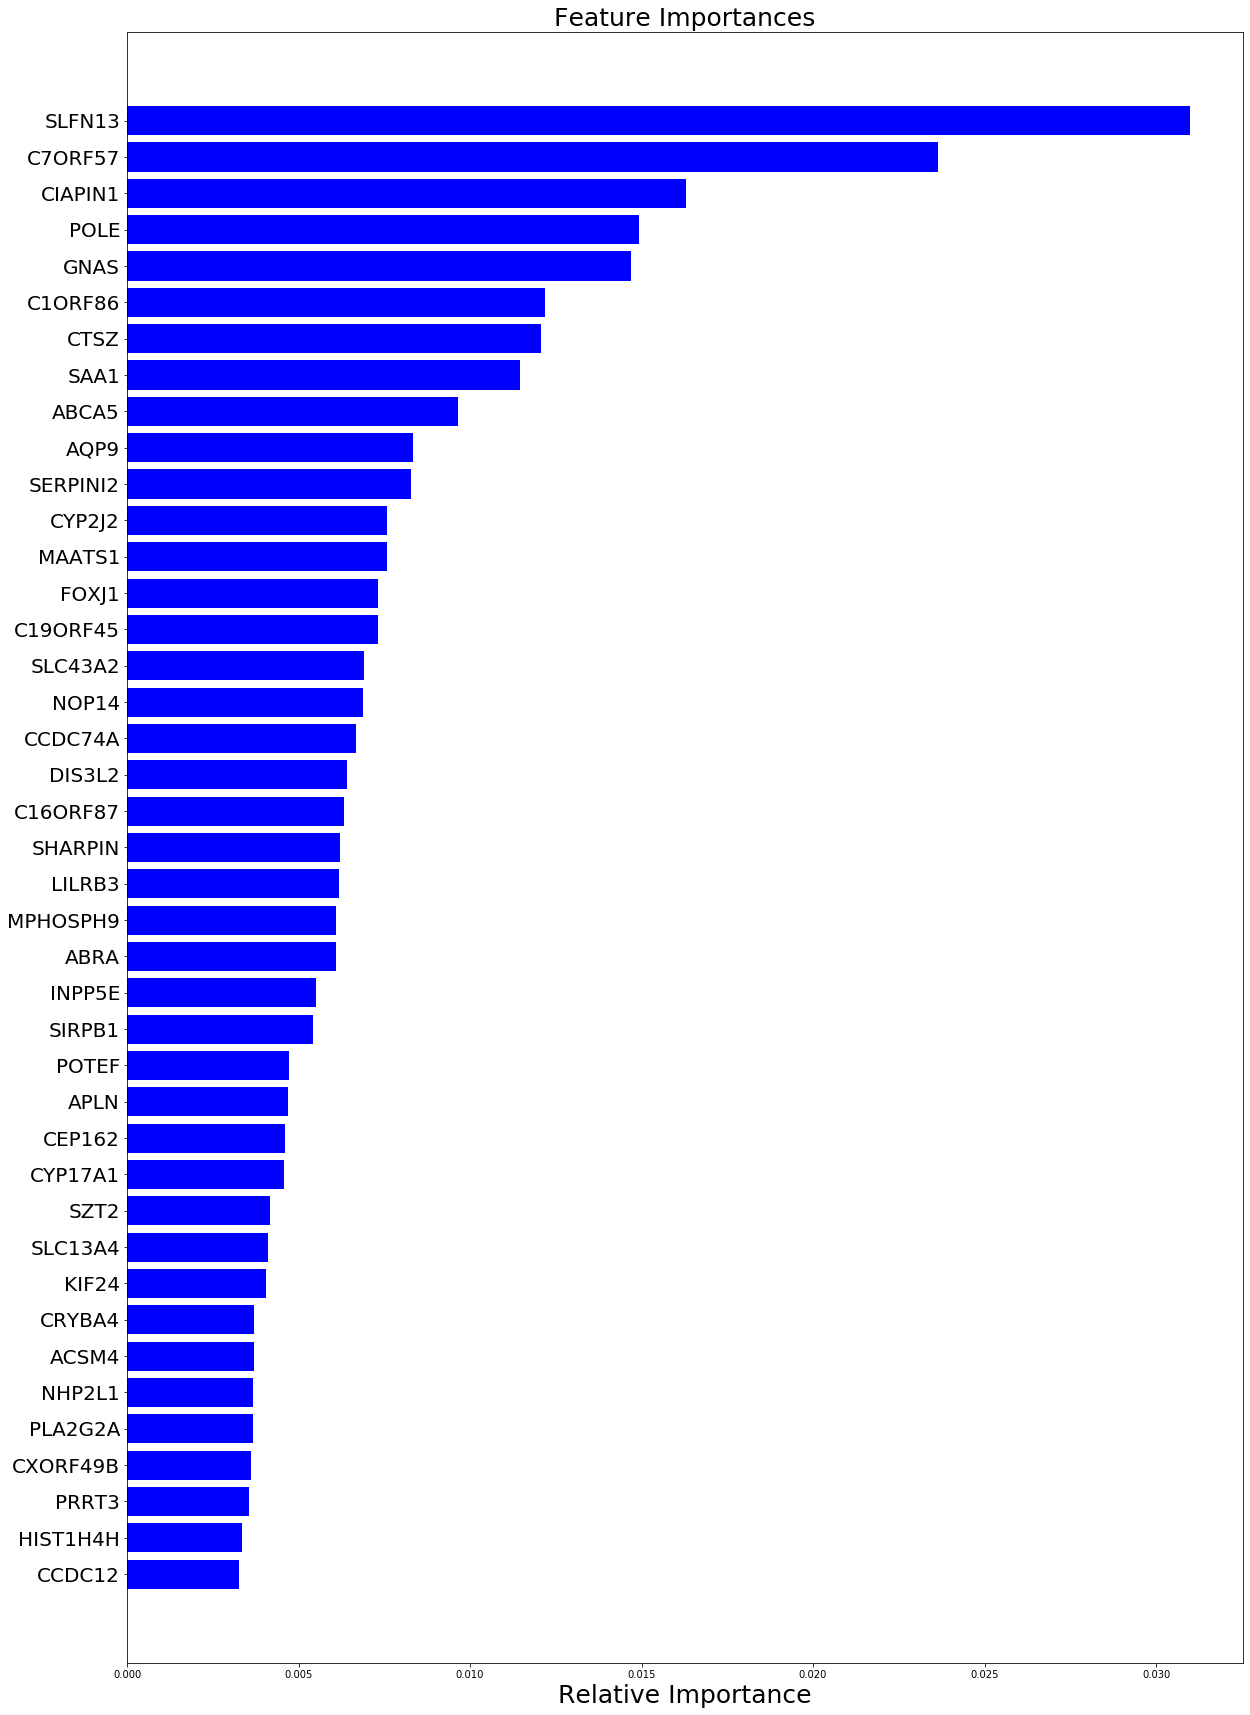

In [16]:
features = X.columns
importances = rgr.feature_importances_
plt.figure(figsize=(20,30))
indices = np.argsort(importances)[-41:]  # top 41 features
plt.title('Feature Importances',fontsize=25)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=20)
plt.xlabel('Relative Importance',fontsize=25)
plt.savefig(r'C:\Users\U0033207PC\Desktop\LUAD FIREHOSE LEGACY DATABASE\PDF PLOT\RF\GBTR\GENES\Features_GENESGBTRRF.pdf')
plt.show()

In [17]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_val = sfm.transform(X_val)
X_important_test = sfm.transform(X_test)

In [18]:
conc1 = np.vstack(X_important_train)
conc2 = np.vstack(X_important_test)
conc3 = np.vstack(X_important_val)

X_important_train = pd.DataFrame(conc1, columns=['EFCAB8','A1BG','GGACT','AACS','AADACL2','ABAT','ABCA5','ABCB6','ABCB8','ABCC11','ABCC4','ABCC9','AOC1','ABRA','ACBD7','ACCSL','ACOT8','ACOX3','ACP2','ACSL4','ACSM4','ACSM5','ACTG2','ACTR3B','ACVR1C','ACVR2A','ACY3','ADAM17','ADAM21','ADAM9','ADAMTS18','ADAMTS20','ADAMTS9','ADAT1','ADCK5','ADD2','ADH5','ADM','ADORA3','ADO','ADRA1B','AFP','AGBL1','AGR3','AGRP','AGTR2','AHCTF1','AHR','AIF1L','AIFM3','AIM2','AK1','AKAP6','AK9','AKR1E2','AKR7A2','AKT2','AKTIP','ALDOA','ALG2','ALG8','ALOX12B','ALX3','AMHR2','AMMECR1L','ANGPT4','ANK1','ANKLE2','ANKRD10','ANKRD19P','ANKRD20A8P','ANKRD22','ANKRD36B','ANKRD39','ANKS4B','ANKZF1','ANO7','AP1G2','AP2A2','AP2S1','AP4M1','APBA2','APBB1IP','APC2','APLN','APOA1BP','APOA5','APOBEC3A','APP','APRT','AQP9','ARF3','ARFIP2','ARG1','ARG2','ARGLU1','ARHGAP19','ARHGEF10','ARHGEF18','ARID2','ARL13B','ARL16','ARL4A','ARMC7','ARPC2','ARPC4','ARR3','ARSA','ARSF','ARSK','ART3','ART4','ASB13','ASB4','ASB6','ASCL3','ASGR1','ASNS','ASPH','ASTN1','ATAD2B','ATAD2','ATAD3C','ATF1','ATG3','ATHL1','ATN1','ATOH8','ATOX1','ATP2A1','ATP5C1','ATP6V0A4','ATP6V0E1','ATP6V1F','ATP6V1G2','ATP6V1H','ATP8A1','ATP8A2','AVIL','B3GALT2','B3GALT4','BACE2','BAG1','BAIAP2L1','BAMBI','BANK1','BARX2','PRRC2A','BBOX1','BCAM','BCAS2','BCL2L10','BCL2L15','BCO1','BCR','BDH1','BEND5','BHLHA15','BHLHB9','BHLHE41','BIRC2','BIRC8','BMP2','BMPR1A','BMPR1B','BPGM','BPI','BRAF','BRD7','BRD9','BRI3','BRSK1','BTC','C10ORF105','C10ORF10','FAM208B','WBP1L','R3HCC1L','C10ORF54','C10ORF88','AKIP1','VPS51','PLET1','LMNTD2','C11ORF86','C12ORF49','C12ORF4','TMEM52B','C12ORF66','SMCO3','C12ORF75','C12ORF77','GPATCH2L','EFCAB11','C14ORF28','PPP1R36','C15ORF52','C15ORF61','C15ORF62','LINC00304','C16ORF87','C17ORF104','TEN1','C17ORF51','CTC1','LRRC75A','FAM215A','C19ORF26','CACTIN','C19ORF45','C1QL4','C1QTNF4','C1ORF106','C1ORF116','SPRTN','METTL18','C1ORF168','ERICH3','TSACC','C1ORF204','SPATA45','COA6','C1ORF50','C1ORF54','TMEM240','C1ORF86','PIFO','FAM213B','GID8','MROH8','RBBP8NL','C20ORF195','RTFDC1','BPIFA2','LINC00310','C22ORF42','LDAH','C2ORF44','C2ORF71','C2ORF81','FAM228A','C2ORF88','MAATS1','CCDC174','TIMMDC1','XXYLT1','C3ORF67','C3ORF70','ARIH2OS','C4BPA','C4ORF19','TRMT44','C4ORF26','NDNF','FDCSP','DCANP1','C5ORF22','SIMC1','CREBRF','C5ORF56','UQCC2','CCDC167','PXDC1','LINC00472','C6ORF163','LINC01590','FAM229B','SAYSD1','C6ORF89','ZC2HC1B','C7ORF26','C7ORF49','C7ORF55','C7ORF57','CPED1','LAMTOR4','FAM220A','NDUFAF6','TTI2','C9ORF139','CYSRT1','C9ORF43','LINC00475','CDKN2A-AS1','C9ORF84','C9ORF85','C9','CA12','CA5BP1','CAB39L','CACNA1D','CACNA1H','CADM1','CALD1','CALM1','CALML3','CAMK2B','CAMK2G','CAMK2N2','CAPG','CAPN11','CAPZA3','CARD11','CARD16','CASK','CASP1','CAV1','CBFA2T3','CBLN1','CBS','CBX1','CBX2','CBX6','CCDC121','CCDC12','CCDC138','CCDC146','CCDC148','CCDC15','CCDC160','CCDC18','CEP85','CCDC39','CCDC74A','CCDC81','CCDC91','CCDC92','CCDC9','CCL20','CCL22','CCL3','CCL5','CCNC','CCNO','CCRL2','CD101','CD180','CD1A','CD247','CD27','CD300E','CD33','CD3EAP','CD3E','CD58','CD59','CD74','CD79A','CD79B','CD7','CDA','CDC27','CDC37L1','CDC5L','CDCA4','CDH20','CDH2','CDK15','CDK16','CDK17','CDK5R2','CDKN2A','CDKN2B','CDKN2C','CDS2','CEACAM7','CEACAM8','CELA1','CELP','CEND1','CENPBD1','CENPC','CENPT','CEP68','CEP70','CES4A','CFHR2','CFTR','CHAF1A','CHCHD1','CHCHD6','CHCHD7','CHD1L','CHD5','CHEK2','CHKB','CHMP4B','CHN2','CHPF2','CHRM4','CHRNA1','CHRNA7','CHST3','CHST5','CHST8','CIAPIN1','CIC','CILP','CKAP4','CKB','CKMT2','CKM','CLCN1','CLCN4','CLC','CLDN10','CLDND2','CLEC12A','CLEC2L','CLEC3B','CLEC4E','CLEC5A','CLNK','CLNS1A','CMTM1','CMTM2','CNGA4','CNIH2','CNIH4','CNOT8','CNTD2','CNTF','CNTN5','CNTNAP3','COASY','COIL','COL10A1','COL18A1','COL28A1','COL5A3','COLEC10','COMMD3','COMP','COPS7B','COPZ2','COQ2','CORO2B','COX18','COX8C','CPA3','CPE','CPLX2','CPN2','CPNE3','CR2','CREM','CRISP3','CRLS1','CRYBA4','CSAG1','CSF3R','CSGALNACT1','CSNK1E','CSPG5','CSRNP3','CSRP2','CSRP3','CST3','CSTA','CT62','CTBP1','CTNNA1','CTNNA2','CTNND1','CTSG','CTSZ','CUL1','CUTA','CUZD1','CWC25','CXCL2','ACKR3','CT55','CXORF49B','CXORF56','CT83','CYB561D1','CYB561','CYB5A','CYB5D2','CYB561A3','CYLD','CYP17A1','CYP27A1','CYP2A6','CYP2J2','CYP3A43','SPECC1','DACT1','DBF4B','DCAF16','DCAF4','DCLRE1A','DCTN1','DCTN6','DDHD2','DDX46','DDX5','DDX6','DEF8','DEFA1B','DEFB4A','DEGS2','DERL2','DERL3','DET1','DFNB31','DGKB','DHCR24','DHCR7','DHFR','DHRS2','DHX29','DIABLO','DIS3L2','DISC1','DISP1','DKK2','DKK3','DLC1','DLEU7','DLG2','DLGAP5','DLL4','DLST','DLX3','DLX5','DMBT1','DMC1','DMPK','DMRT3','DNA2','DNAH17','DNAJC11','DNAJC14','DNAJC21','DNAJC2','DNAJC30','DNAJC8','DNASE1','DNMT3B','DOCK9','DOK1','DOK6','DONSON','DPH2','DPY19L2P1','DPYSL2','DPYS','DSCAML1','DSCAM','DSG1','DUOX1','DUSP13','DUT','DVL2','DVL3','COL6A4P1','DYRK1A','DYRK4','DYX1C1','EBI3','EBPL','EDA2R','EDC3','EDEM3','EEF2','CRACR2B','MICU2','MICU3','EFNB2','EHHADH','EID2','EIF4EBP3','ELAC2','ELL2','ELMO3','ELOVL7','DBIL5P','COL26A1','ENHO','ENOSF1','ENPP5','ENTPD2','ENTPD4','ENTPD6','EPB41L4B','EPC1','EPHA3','EPHX1','EPRS','EPX','EPYC','ERCC1','ERCC6','ERH','ERICH1','ERN2','ESPN','ESRRA','ETHE1','ETS1','ETV1','EVI2B','EVL','EXOC2','EXOC3L2','EXOC7','EXOSC6','EXTL3','FABP1','FABP5P3','FABP5','FAM102B','ABHD17B','FAM117A','FAM117B','FAM118A','AMER2','FAM13B','FAM13C','FAM151A','FAM155B','FAM161A','ZC2HC1C','FAM167A','FAM170A','FAM175B','FAM182A','FAM187B','FAM193A','FAM19A4','FAM32A','FAM3C','STRIP2','FAM49A','FAM58A','FAM63B','FAM71D','FAM98A','FANCA','FANCB','FANCF','FANCL','FASTKD2','FBP1','FBP2','FBXL19','FBXL20','FBXO10','FBXO28','FBXO33','FBXO42','FBXO43','FBXO46','FBXO7','FBXW11','FCGR1A','FCHO1','FDFT1','FDPS','FDXACB1','FEM1A','FEM1B','FGF17','FGF18','FGF1','FGF3','FGFBP2','FIBIN','FIZ1','FKBP10','FKBP7','CASC15','CCDC71L','FLNC','FLT1','FMO1','FNDC1','FOSL1','FOXD3','FOXF2','FOXJ1','FOXK2','FOXL2','FOXO3','FOXP2','FOXRED2','FPGT','FPR3','FRMPD4','FRS3','FTL','FTSJ3','FUBP1','FUCA2','FUNDC2P2','FUT7','FUT9','FYTTD1','G3BP1','G6PC','GADD45A','GADD45G','GALNT10','GALNT1','GAN','GAPDHS','GAS8','GBA3','GCDH','GCH1','GCNT3','GDF3','GDF6','GDNF','ARHGEF25','GEN1','GFOD1','GFOD2','GFPT2','GFRA2','GGCT','GGPS1','GGT7','GIPC3','GJA1','GJB5','GLCCI1','GLIPR1L1','GLRA3','GLS','CPTP','GLUD1','GMIP','GMPR2','GNAS','GNB5','GNG3','GNRH1','GOLGA7','GOLGA8G','GP1BA','GP9','GPAT2','GPATCH4','GPD2','GPHA2','GPN2','GPR12','GPR132','GPR146','GPR156','GPR25','GPR39','GPR55','GPR84','GPS2','GPT2','GRAMD1B','GRIA2','GRIK2','GRIN1','GRK7','GRM1','GRM3','GRM5','GRPR','GSDMD','GSK3A','GSTM4','GSTO1','GSTT2','GTF2A1L','GTF2F2','GTF2H2','GXYLT2','GZMA','GZMM','H2AFX','H3F3B','HABP4','HAGH','HAPLN4','HAR1A','HARS2','HARS','HBA1','HBE1','HCG22','HCG27','HCLS1','HDAC6','HEBP1','HEPACAM2','HERC4','HERPUD1','HES2','HEXIM2','HEYL','HGFAC','HIATL1','HIST1H1B','HIST1H2AB','HIST1H2BB','HIST1H3C','HIST1H3F','HIST1H4D','HIST1H4H','HMBS','HMGB1','HMGCS2','HMGN1','HMGN2','HNF4A','HNRNPA2B1','HNRNPH1','HOXA10','HOXB8','HOXC5','HOXD11','HOXD3','HPCAL1','HPS1','HPS4','HRASLS5','HRH1','HRH3','HRK','HS2ST1','HSD11B1','HSD17B13','HSDL2','HSH2D','HSPA12A','HSPA13','LINC00339','HTR2C','HTRA4','HUS1B','HVCN1','HYAL4','ICOS','IDI1','IDI2','IER3IP1','IER3','IER5L','IFFO1','IFI6','IFITM3','IFNA8','IFNGR2','IFT80','IGDCC3','IGF2BP1','IGFBP1','IGFBP4','IGFBP7','IGFN1','IGSF11','IGSF6','IGSF9B','IGSF9','IKBIP','IKBKE','IKZF5','IL12A','IL13RA2','IL13','IL17A','IL17RA','IL1B','IL1R2','IL1RAP','IL21R','IL22RA1','IL6ST','IL7R','ILF2','IMPACT','IMPAD1','INGX','INPP5D','INPP5E','INSL4','INTS10','INTS3','INTS4P2','INTS4','IPO11','IPO7','IQCK','IRAK1','IRF9','ISM2','ITFG1','ITLN2','ITM2A','IWS1','JAKMIP2','KDM7A','JKAMP','JRKL','AJUBA','KALRN','KATNB1','KCNA2','KCNA5','KCNA7','KCNAB3','KCNB1','KCNH1','KCNIP1','KCNJ11','KCNJ14','KCNJ16','KCNJ6','KCNK3','KCNMA1','KCNMB2','KCNN4','KCNQ1','KCNQ4','KCNS2','KCTD19','KCTD6','KDM1B','KDM2B','KDM4A','KDM6B','KEL','KHK','KIAA0020','KIAA0125','KIAA0232','SZT2','VWA8','TESPA1','CEP162','KIAA1045','KIAA1257','PALD1','KIAA1324','MAP10','CFAP97','RIC1','KIAA1468','NYAP2','KIAA1598','KIAA1683','FOCAD','CCAR2','KIF18B','KIF24','KIF5A','KIF5B','KIN','KIR2DL1','KIR2DL4','KIR3DL2','KIR3DL3','KLF12','KLHDC4','KLHL12','KLHL14','KLHL25','KLHL29','KLHL33','KLHL3','KLHL6','KLK1','KLK7','KLRC1','KRT34','KRT40','KRT7','KRTCAP2','POGLUT1','KTI12','KYNU','L1CAM','LAMC3','LAPTM4B','LARGE','CERS1','CERS2','LBH','LCP2','LCT','LDHAL6B','LDHD','LDLRAD1','LDLRAD2','LDLR','LEPROTL1','LEP','LGR5','LHX9','LIFR','LIF','LIG1','LILRB3','LILRB4','LIME1','LIMS2','LLGL2','LMAN1','LMO7','LMOD3','NPIPB5','LINC00961','LINC00925','LINC00883','PTCHD3P1','UBAP1L','CTAGE15','SMIM5','GMNC','LINC00669','FAM86FP','CLEC19A','FAHD2CP','LINC00847','LPGAT1','LPP','LRAT','LRIG2','LRIT2','LRIT3','LRP12','LRP3','LRRC14','LRRC57','LRRC59','LRRC8D','LRRC8E','LRRFIP2','LSM11','LSM12','LSM14A','LST1','LTA4H','LTB4R','LTC4S','LY6G5C','LY96','LYN','LYSMD3','MAB21L2','MAD2L1BP','MAD2L1','MAEA','MAEL','MAGEC2','MAGEE1','MAML3','MAMLD1','MANBAL','MANSC1','MAOB','MAP1LC3A','MAP2','MAP3K12','MAP3K15','MAP3K5','MAP3K8','MAP9','MAPKAPK5','MAPRE2','MC2R','MCM8','MCOLN3','MDM2','MEAF6','MECOM','MED12L','MED13','MED15','MED17','MED21','MEF2D','MEG3','MEPE','MESDC1','METTL16','METTL15','METTL11B','METTL12','MEX3A','MFN1','MGAT1','MGAT4B','MIR503HG','NIM1K','STEAP1B','MICAL2','MID1IP1','MINPP1','MIPEP','MIPOL1','MITD1','MKL2','MLLT4','MMAB','MMACHC','MMD','MMP13','MMP16','MNS1','MNT','MOCS1','MORN1','MPG','MPHOSPH8','MPHOSPH9','MPP5','MPPED1','MRFAP1','MRGPRE','MRI1','MRPL16','MRPL24','MRPL27','MRPL36','MRPS11','MRVI1','MSC','MSL1','MT1E','MT1G','MT3','MTCH2','MTERF1','MTF1','MTHFD1L','MTHFD2L','MTHFS','MTL5','MTMR11','MTMR3','MTMR9','MTX3','MUM1','MURC','MUS81','MXD1','MYBBP1A','MYCBPAP','MYH7','MYL9','MYLK2','MYO19','MYO3A','MYOCD','MYOM2','MYRIP','KAT6A','MYT1','N4BP3','N6AMT1','N6AMT2','NAB2','NACC1','NAGLU','NAMPT','NANOG','NAP1L1','NAP1L6','NAPSA','NBN','NBR1','NBR2','NCAPG','NCK2','NCR3','BBIP1','LINC00176','NDST1','NDST2','NDUFA13','NDUFA6','NDUFS6','NEDD9','NELL2','NFE2L3','NFKBIZ','NFRKB','NFYB','SLC9B1','NHLRC3','NHP2L1','NID1','NIPSNAP3B','NLRC3','NLRP2','NMBR','NMU','NNAT','NODAL','NOL3','NOL9','NOMO2','NONO','NOP14','NOS1AP','NOS2','NOSIP','NOTCH2NL','NOX5','NPC2','NPDC1','NPEPPS','NPHP4','NPLOC4','NPM2','NPR2','NR2E3','NRF1','NRIP3','NRSN2','NSMCE1','NSMCE4A','NT5DC1','NTM','NUDC','NUDT15','NUMBL','NUP210L','NUP93','NUP98','NXPH2','OAF','ODF2L','TENM3','OLFM4','OR2A7','OR2K2','OR2M4','OR4F5','OR52N4','ORC2','ORC4','ORC5','SLC51B','OTOF','OVGP1','OXCT2','P2RY10','P4HA3','PAAF1','PABPC1L2B','PABPC1L','PACSIN2','PADI3','PAK3','PALB2','PALLD','PALM2','PANK1','PANX2','PAPD5','PAPOLA','PAPOLG','PARP10','PARP12','PARP14','PARVA','PATL1','PATZ1','PAXIP1','PBX4','PCBD2','PCBP1','PCDH1','PCDHA3','PCDHA9','PCDHB14','PCDHB17P','PCDHB18P','PCDHB2','PCDHB8','PCDHGA6','PCDHGA8','PCDHGB2','PCDHGB6','PCSK2','PDCD6IP','PDC','PDE8A','PDGFA','PDGFB','PDHX','PDIK1L','PDLIM2','PDLIM5','PDP2','PDSS2','PDZK1','PEX11B','PEX7','PFAS','PFKFB2','PFKFB4','PGM1','PGM2','PGR','PGS1','PHACTR1','PHACTR2','JADE1','PHF1','PHF23','PHKA1','PHOSPHO1','PI3','PIBF1','PICALM','PIGK','PIGV','PIGW','PIK3IP1','PIM1','PIP4K2A','PIPSL','PISD','PITPNC1','PITPNM3','PIWIL2','PKHD1L1','PKIB','PKIG','PKN1','PKP1','PKP4','C7ORF73','PLA2G2A','PLA2G4A','PLA2G4C','PLA2G4E','PLA2G4F','PLCD1','PLD2','PLEK2','PLEKHB1','PLEKHG7','PLEK','PLIN1','PLN','PLP1','PLP2','PLTP','PMFBP1','PMS1','PMS2','PNLDC1','PNMAL1','PNN','PNOC','POLE','POLR1A','POLR3GL','POM121L9P','POMT1','PORCN','POTEE','POTEF','POU2AF1','POU5F1','PPARA','PPARGC1A','PPEF1','PPFIA2','PPIG','PPIL1','PPIL4','PPIP5K1','PPP1CC','PPP1R10','PPP1R14B','PPP2CB','PPP2R5C','PPT1','PRAP1','PRB3','PRDM4','PRORSD1P','PRELP','PREX2','PRIM1','PRIMA1','PRKAG1','PRKAR2B','PRKCD','PRKG1','PRLR','PRL','PRM1','PRMT1','PROK1','PROK2','PRPF31','PRPF8','PRPS1L1','PRPS2','PRR11','PRR22','PRR4','PRRC1','PRRT1','PRRT2','PRRT3','PRSS53','PSD','PSKH1','PSMB10','PTBP2','PTCHD3','PTGER2','PTGER4','PTGR2','PTPMT1','PTPN14','PTPN4','PTPRN2','PTPRZ1','PUS7','PXT1','PYCARD','PYGL','PYGM','QRFPR','QSOX1','RAB11FIP5','RAB18','RAB33A','RAB3IL1','RAB9B','RABEPK','RABGAP1L','RABGEF1','RABL2B','RAC3','RAD17','RAD1','RAD9A','SLC50A1','MOK','RAI2','RALGPS1','RANBP3L','RAP1A','RAP1GAP','RAP2C','RAPH1','RARRES3','RASA1','RASAL2','RASD1','RASD2','RASGEF1C','RASGRF1','RASSF1','RBM17','RBM18','RBM25','RBM26','RBM38','RC3H2','RCAN2','RCBTB1','RCC2','RDH16','RDH8','REEP1','RERGL','RFPL1S','RFPL2','RFPL3','RFX3','RGL2','RGMA','RGN','RGS2','RGS3','RGS9','RHEBL1','RHEB','RHOB','RHO','RIBC2','RILP','RIN2','RMND1','RMND5A','RND2','RNF10','RNF113A','RNF114','RNF115','RNF121','RNF126P1','RNF130','RNF168','RNF185','RNF207','RNF208','RNF20','RNF213','RNF220','RNF26','RNF31','RNF4','RP9P','RPF1','RPF2','RPL11','RPL34','RPL35A','RPL9','RPS17','RPS6KL1','RPSA','RPUSD2','RRH','RRN3P1','RRP7BP','RSPO3','RSU1','RTP1','RUNDC3B','RUNX1','RYR2','S100A5','S100A8','SAA1','SAAL1','SAC3D1','SAP30','PPP6R1','SBSN','MSMO1','SCARNA10','SCD','SCG2','SCN10A','SCN11A','SCN1A','SCN5A','SCN7A','SCNN1A','SCUBE3','SCYL2','SDHC','SEC14L5','SEC16A','SEC63','SECISBP2L','SECISBP2','SEL1L3','SELK','SEMA4F','SEPP1','SERHL','SERPINA9','SERPINC1','SERPINI2','SERTAD4','SETD1A','SETD7','SETMAR','SET','SEZ6L2','SF3A3','SFMBT2','SREK1','SUGP2','SFTA1P','SGCD','POMK','SGK494','SH2D3C','SH2D4A','SHANK2','SHARPIN','SHC1','SHISA3','SHQ1','SIAE','SIGLEC12','SIGLEC14','SIN3A','GEMIN2','SIRPB1','SIRT3','SIX1','SI','SKIV2L','SLAMF7','SLAMF9','SLBP','SLC13A4','SLC14A1','SLC16A10','SLC16A13','SLC16A1','SLC16A8','SLC17A7','SLC19A3','SLC20A2','SLC22A5','SLC25A15','SLC25A20','SLC25A22','SLC25A27','SLC25A30','SLC25A33','SLC25A44','SLC25A4','SLC27A2','SLC27A4','SLC30A5','SLC30A9','SLC35A1','SLC35B4','SLC35D3','SLC35E2B','SLC38A5','SLC38A6','SLC43A2','SLC44A3','SLC45A2','SLC4A1AP','SLC5A3','SLC5A4','SLC6A17','SLC6A1','SLC7A10','SLC7A7','SLC9C1','SLC9C2','SLC9A4','SLFN13','SLITRK6','SLTM','SLU7'
                                                ])
X_important_test = pd.DataFrame(conc2, columns=['EFCAB8','A1BG','GGACT','AACS','AADACL2','ABAT','ABCA5','ABCB6','ABCB8','ABCC11','ABCC4','ABCC9','AOC1','ABRA','ACBD7','ACCSL','ACOT8','ACOX3','ACP2','ACSL4','ACSM4','ACSM5','ACTG2','ACTR3B','ACVR1C','ACVR2A','ACY3','ADAM17','ADAM21','ADAM9','ADAMTS18','ADAMTS20','ADAMTS9','ADAT1','ADCK5','ADD2','ADH5','ADM','ADORA3','ADO','ADRA1B','AFP','AGBL1','AGR3','AGRP','AGTR2','AHCTF1','AHR','AIF1L','AIFM3','AIM2','AK1','AKAP6','AK9','AKR1E2','AKR7A2','AKT2','AKTIP','ALDOA','ALG2','ALG8','ALOX12B','ALX3','AMHR2','AMMECR1L','ANGPT4','ANK1','ANKLE2','ANKRD10','ANKRD19P','ANKRD20A8P','ANKRD22','ANKRD36B','ANKRD39','ANKS4B','ANKZF1','ANO7','AP1G2','AP2A2','AP2S1','AP4M1','APBA2','APBB1IP','APC2','APLN','APOA1BP','APOA5','APOBEC3A','APP','APRT','AQP9','ARF3','ARFIP2','ARG1','ARG2','ARGLU1','ARHGAP19','ARHGEF10','ARHGEF18','ARID2','ARL13B','ARL16','ARL4A','ARMC7','ARPC2','ARPC4','ARR3','ARSA','ARSF','ARSK','ART3','ART4','ASB13','ASB4','ASB6','ASCL3','ASGR1','ASNS','ASPH','ASTN1','ATAD2B','ATAD2','ATAD3C','ATF1','ATG3','ATHL1','ATN1','ATOH8','ATOX1','ATP2A1','ATP5C1','ATP6V0A4','ATP6V0E1','ATP6V1F','ATP6V1G2','ATP6V1H','ATP8A1','ATP8A2','AVIL','B3GALT2','B3GALT4','BACE2','BAG1','BAIAP2L1','BAMBI','BANK1','BARX2','PRRC2A','BBOX1','BCAM','BCAS2','BCL2L10','BCL2L15','BCO1','BCR','BDH1','BEND5','BHLHA15','BHLHB9','BHLHE41','BIRC2','BIRC8','BMP2','BMPR1A','BMPR1B','BPGM','BPI','BRAF','BRD7','BRD9','BRI3','BRSK1','BTC','C10ORF105','C10ORF10','FAM208B','WBP1L','R3HCC1L','C10ORF54','C10ORF88','AKIP1','VPS51','PLET1','LMNTD2','C11ORF86','C12ORF49','C12ORF4','TMEM52B','C12ORF66','SMCO3','C12ORF75','C12ORF77','GPATCH2L','EFCAB11','C14ORF28','PPP1R36','C15ORF52','C15ORF61','C15ORF62','LINC00304','C16ORF87','C17ORF104','TEN1','C17ORF51','CTC1','LRRC75A','FAM215A','C19ORF26','CACTIN','C19ORF45','C1QL4','C1QTNF4','C1ORF106','C1ORF116','SPRTN','METTL18','C1ORF168','ERICH3','TSACC','C1ORF204','SPATA45','COA6','C1ORF50','C1ORF54','TMEM240','C1ORF86','PIFO','FAM213B','GID8','MROH8','RBBP8NL','C20ORF195','RTFDC1','BPIFA2','LINC00310','C22ORF42','LDAH','C2ORF44','C2ORF71','C2ORF81','FAM228A','C2ORF88','MAATS1','CCDC174','TIMMDC1','XXYLT1','C3ORF67','C3ORF70','ARIH2OS','C4BPA','C4ORF19','TRMT44','C4ORF26','NDNF','FDCSP','DCANP1','C5ORF22','SIMC1','CREBRF','C5ORF56','UQCC2','CCDC167','PXDC1','LINC00472','C6ORF163','LINC01590','FAM229B','SAYSD1','C6ORF89','ZC2HC1B','C7ORF26','C7ORF49','C7ORF55','C7ORF57','CPED1','LAMTOR4','FAM220A','NDUFAF6','TTI2','C9ORF139','CYSRT1','C9ORF43','LINC00475','CDKN2A-AS1','C9ORF84','C9ORF85','C9','CA12','CA5BP1','CAB39L','CACNA1D','CACNA1H','CADM1','CALD1','CALM1','CALML3','CAMK2B','CAMK2G','CAMK2N2','CAPG','CAPN11','CAPZA3','CARD11','CARD16','CASK','CASP1','CAV1','CBFA2T3','CBLN1','CBS','CBX1','CBX2','CBX6','CCDC121','CCDC12','CCDC138','CCDC146','CCDC148','CCDC15','CCDC160','CCDC18','CEP85','CCDC39','CCDC74A','CCDC81','CCDC91','CCDC92','CCDC9','CCL20','CCL22','CCL3','CCL5','CCNC','CCNO','CCRL2','CD101','CD180','CD1A','CD247','CD27','CD300E','CD33','CD3EAP','CD3E','CD58','CD59','CD74','CD79A','CD79B','CD7','CDA','CDC27','CDC37L1','CDC5L','CDCA4','CDH20','CDH2','CDK15','CDK16','CDK17','CDK5R2','CDKN2A','CDKN2B','CDKN2C','CDS2','CEACAM7','CEACAM8','CELA1','CELP','CEND1','CENPBD1','CENPC','CENPT','CEP68','CEP70','CES4A','CFHR2','CFTR','CHAF1A','CHCHD1','CHCHD6','CHCHD7','CHD1L','CHD5','CHEK2','CHKB','CHMP4B','CHN2','CHPF2','CHRM4','CHRNA1','CHRNA7','CHST3','CHST5','CHST8','CIAPIN1','CIC','CILP','CKAP4','CKB','CKMT2','CKM','CLCN1','CLCN4','CLC','CLDN10','CLDND2','CLEC12A','CLEC2L','CLEC3B','CLEC4E','CLEC5A','CLNK','CLNS1A','CMTM1','CMTM2','CNGA4','CNIH2','CNIH4','CNOT8','CNTD2','CNTF','CNTN5','CNTNAP3','COASY','COIL','COL10A1','COL18A1','COL28A1','COL5A3','COLEC10','COMMD3','COMP','COPS7B','COPZ2','COQ2','CORO2B','COX18','COX8C','CPA3','CPE','CPLX2','CPN2','CPNE3','CR2','CREM','CRISP3','CRLS1','CRYBA4','CSAG1','CSF3R','CSGALNACT1','CSNK1E','CSPG5','CSRNP3','CSRP2','CSRP3','CST3','CSTA','CT62','CTBP1','CTNNA1','CTNNA2','CTNND1','CTSG','CTSZ','CUL1','CUTA','CUZD1','CWC25','CXCL2','ACKR3','CT55','CXORF49B','CXORF56','CT83','CYB561D1','CYB561','CYB5A','CYB5D2','CYB561A3','CYLD','CYP17A1','CYP27A1','CYP2A6','CYP2J2','CYP3A43','SPECC1','DACT1','DBF4B','DCAF16','DCAF4','DCLRE1A','DCTN1','DCTN6','DDHD2','DDX46','DDX5','DDX6','DEF8','DEFA1B','DEFB4A','DEGS2','DERL2','DERL3','DET1','DFNB31','DGKB','DHCR24','DHCR7','DHFR','DHRS2','DHX29','DIABLO','DIS3L2','DISC1','DISP1','DKK2','DKK3','DLC1','DLEU7','DLG2','DLGAP5','DLL4','DLST','DLX3','DLX5','DMBT1','DMC1','DMPK','DMRT3','DNA2','DNAH17','DNAJC11','DNAJC14','DNAJC21','DNAJC2','DNAJC30','DNAJC8','DNASE1','DNMT3B','DOCK9','DOK1','DOK6','DONSON','DPH2','DPY19L2P1','DPYSL2','DPYS','DSCAML1','DSCAM','DSG1','DUOX1','DUSP13','DUT','DVL2','DVL3','COL6A4P1','DYRK1A','DYRK4','DYX1C1','EBI3','EBPL','EDA2R','EDC3','EDEM3','EEF2','CRACR2B','MICU2','MICU3','EFNB2','EHHADH','EID2','EIF4EBP3','ELAC2','ELL2','ELMO3','ELOVL7','DBIL5P','COL26A1','ENHO','ENOSF1','ENPP5','ENTPD2','ENTPD4','ENTPD6','EPB41L4B','EPC1','EPHA3','EPHX1','EPRS','EPX','EPYC','ERCC1','ERCC6','ERH','ERICH1','ERN2','ESPN','ESRRA','ETHE1','ETS1','ETV1','EVI2B','EVL','EXOC2','EXOC3L2','EXOC7','EXOSC6','EXTL3','FABP1','FABP5P3','FABP5','FAM102B','ABHD17B','FAM117A','FAM117B','FAM118A','AMER2','FAM13B','FAM13C','FAM151A','FAM155B','FAM161A','ZC2HC1C','FAM167A','FAM170A','FAM175B','FAM182A','FAM187B','FAM193A','FAM19A4','FAM32A','FAM3C','STRIP2','FAM49A','FAM58A','FAM63B','FAM71D','FAM98A','FANCA','FANCB','FANCF','FANCL','FASTKD2','FBP1','FBP2','FBXL19','FBXL20','FBXO10','FBXO28','FBXO33','FBXO42','FBXO43','FBXO46','FBXO7','FBXW11','FCGR1A','FCHO1','FDFT1','FDPS','FDXACB1','FEM1A','FEM1B','FGF17','FGF18','FGF1','FGF3','FGFBP2','FIBIN','FIZ1','FKBP10','FKBP7','CASC15','CCDC71L','FLNC','FLT1','FMO1','FNDC1','FOSL1','FOXD3','FOXF2','FOXJ1','FOXK2','FOXL2','FOXO3','FOXP2','FOXRED2','FPGT','FPR3','FRMPD4','FRS3','FTL','FTSJ3','FUBP1','FUCA2','FUNDC2P2','FUT7','FUT9','FYTTD1','G3BP1','G6PC','GADD45A','GADD45G','GALNT10','GALNT1','GAN','GAPDHS','GAS8','GBA3','GCDH','GCH1','GCNT3','GDF3','GDF6','GDNF','ARHGEF25','GEN1','GFOD1','GFOD2','GFPT2','GFRA2','GGCT','GGPS1','GGT7','GIPC3','GJA1','GJB5','GLCCI1','GLIPR1L1','GLRA3','GLS','CPTP','GLUD1','GMIP','GMPR2','GNAS','GNB5','GNG3','GNRH1','GOLGA7','GOLGA8G','GP1BA','GP9','GPAT2','GPATCH4','GPD2','GPHA2','GPN2','GPR12','GPR132','GPR146','GPR156','GPR25','GPR39','GPR55','GPR84','GPS2','GPT2','GRAMD1B','GRIA2','GRIK2','GRIN1','GRK7','GRM1','GRM3','GRM5','GRPR','GSDMD','GSK3A','GSTM4','GSTO1','GSTT2','GTF2A1L','GTF2F2','GTF2H2','GXYLT2','GZMA','GZMM','H2AFX','H3F3B','HABP4','HAGH','HAPLN4','HAR1A','HARS2','HARS','HBA1','HBE1','HCG22','HCG27','HCLS1','HDAC6','HEBP1','HEPACAM2','HERC4','HERPUD1','HES2','HEXIM2','HEYL','HGFAC','HIATL1','HIST1H1B','HIST1H2AB','HIST1H2BB','HIST1H3C','HIST1H3F','HIST1H4D','HIST1H4H','HMBS','HMGB1','HMGCS2','HMGN1','HMGN2','HNF4A','HNRNPA2B1','HNRNPH1','HOXA10','HOXB8','HOXC5','HOXD11','HOXD3','HPCAL1','HPS1','HPS4','HRASLS5','HRH1','HRH3','HRK','HS2ST1','HSD11B1','HSD17B13','HSDL2','HSH2D','HSPA12A','HSPA13','LINC00339','HTR2C','HTRA4','HUS1B','HVCN1','HYAL4','ICOS','IDI1','IDI2','IER3IP1','IER3','IER5L','IFFO1','IFI6','IFITM3','IFNA8','IFNGR2','IFT80','IGDCC3','IGF2BP1','IGFBP1','IGFBP4','IGFBP7','IGFN1','IGSF11','IGSF6','IGSF9B','IGSF9','IKBIP','IKBKE','IKZF5','IL12A','IL13RA2','IL13','IL17A','IL17RA','IL1B','IL1R2','IL1RAP','IL21R','IL22RA1','IL6ST','IL7R','ILF2','IMPACT','IMPAD1','INGX','INPP5D','INPP5E','INSL4','INTS10','INTS3','INTS4P2','INTS4','IPO11','IPO7','IQCK','IRAK1','IRF9','ISM2','ITFG1','ITLN2','ITM2A','IWS1','JAKMIP2','KDM7A','JKAMP','JRKL','AJUBA','KALRN','KATNB1','KCNA2','KCNA5','KCNA7','KCNAB3','KCNB1','KCNH1','KCNIP1','KCNJ11','KCNJ14','KCNJ16','KCNJ6','KCNK3','KCNMA1','KCNMB2','KCNN4','KCNQ1','KCNQ4','KCNS2','KCTD19','KCTD6','KDM1B','KDM2B','KDM4A','KDM6B','KEL','KHK','KIAA0020','KIAA0125','KIAA0232','SZT2','VWA8','TESPA1','CEP162','KIAA1045','KIAA1257','PALD1','KIAA1324','MAP10','CFAP97','RIC1','KIAA1468','NYAP2','KIAA1598','KIAA1683','FOCAD','CCAR2','KIF18B','KIF24','KIF5A','KIF5B','KIN','KIR2DL1','KIR2DL4','KIR3DL2','KIR3DL3','KLF12','KLHDC4','KLHL12','KLHL14','KLHL25','KLHL29','KLHL33','KLHL3','KLHL6','KLK1','KLK7','KLRC1','KRT34','KRT40','KRT7','KRTCAP2','POGLUT1','KTI12','KYNU','L1CAM','LAMC3','LAPTM4B','LARGE','CERS1','CERS2','LBH','LCP2','LCT','LDHAL6B','LDHD','LDLRAD1','LDLRAD2','LDLR','LEPROTL1','LEP','LGR5','LHX9','LIFR','LIF','LIG1','LILRB3','LILRB4','LIME1','LIMS2','LLGL2','LMAN1','LMO7','LMOD3','NPIPB5','LINC00961','LINC00925','LINC00883','PTCHD3P1','UBAP1L','CTAGE15','SMIM5','GMNC','LINC00669','FAM86FP','CLEC19A','FAHD2CP','LINC00847','LPGAT1','LPP','LRAT','LRIG2','LRIT2','LRIT3','LRP12','LRP3','LRRC14','LRRC57','LRRC59','LRRC8D','LRRC8E','LRRFIP2','LSM11','LSM12','LSM14A','LST1','LTA4H','LTB4R','LTC4S','LY6G5C','LY96','LYN','LYSMD3','MAB21L2','MAD2L1BP','MAD2L1','MAEA','MAEL','MAGEC2','MAGEE1','MAML3','MAMLD1','MANBAL','MANSC1','MAOB','MAP1LC3A','MAP2','MAP3K12','MAP3K15','MAP3K5','MAP3K8','MAP9','MAPKAPK5','MAPRE2','MC2R','MCM8','MCOLN3','MDM2','MEAF6','MECOM','MED12L','MED13','MED15','MED17','MED21','MEF2D','MEG3','MEPE','MESDC1','METTL16','METTL15','METTL11B','METTL12','MEX3A','MFN1','MGAT1','MGAT4B','MIR503HG','NIM1K','STEAP1B','MICAL2','MID1IP1','MINPP1','MIPEP','MIPOL1','MITD1','MKL2','MLLT4','MMAB','MMACHC','MMD','MMP13','MMP16','MNS1','MNT','MOCS1','MORN1','MPG','MPHOSPH8','MPHOSPH9','MPP5','MPPED1','MRFAP1','MRGPRE','MRI1','MRPL16','MRPL24','MRPL27','MRPL36','MRPS11','MRVI1','MSC','MSL1','MT1E','MT1G','MT3','MTCH2','MTERF1','MTF1','MTHFD1L','MTHFD2L','MTHFS','MTL5','MTMR11','MTMR3','MTMR9','MTX3','MUM1','MURC','MUS81','MXD1','MYBBP1A','MYCBPAP','MYH7','MYL9','MYLK2','MYO19','MYO3A','MYOCD','MYOM2','MYRIP','KAT6A','MYT1','N4BP3','N6AMT1','N6AMT2','NAB2','NACC1','NAGLU','NAMPT','NANOG','NAP1L1','NAP1L6','NAPSA','NBN','NBR1','NBR2','NCAPG','NCK2','NCR3','BBIP1','LINC00176','NDST1','NDST2','NDUFA13','NDUFA6','NDUFS6','NEDD9','NELL2','NFE2L3','NFKBIZ','NFRKB','NFYB','SLC9B1','NHLRC3','NHP2L1','NID1','NIPSNAP3B','NLRC3','NLRP2','NMBR','NMU','NNAT','NODAL','NOL3','NOL9','NOMO2','NONO','NOP14','NOS1AP','NOS2','NOSIP','NOTCH2NL','NOX5','NPC2','NPDC1','NPEPPS','NPHP4','NPLOC4','NPM2','NPR2','NR2E3','NRF1','NRIP3','NRSN2','NSMCE1','NSMCE4A','NT5DC1','NTM','NUDC','NUDT15','NUMBL','NUP210L','NUP93','NUP98','NXPH2','OAF','ODF2L','TENM3','OLFM4','OR2A7','OR2K2','OR2M4','OR4F5','OR52N4','ORC2','ORC4','ORC5','SLC51B','OTOF','OVGP1','OXCT2','P2RY10','P4HA3','PAAF1','PABPC1L2B','PABPC1L','PACSIN2','PADI3','PAK3','PALB2','PALLD','PALM2','PANK1','PANX2','PAPD5','PAPOLA','PAPOLG','PARP10','PARP12','PARP14','PARVA','PATL1','PATZ1','PAXIP1','PBX4','PCBD2','PCBP1','PCDH1','PCDHA3','PCDHA9','PCDHB14','PCDHB17P','PCDHB18P','PCDHB2','PCDHB8','PCDHGA6','PCDHGA8','PCDHGB2','PCDHGB6','PCSK2','PDCD6IP','PDC','PDE8A','PDGFA','PDGFB','PDHX','PDIK1L','PDLIM2','PDLIM5','PDP2','PDSS2','PDZK1','PEX11B','PEX7','PFAS','PFKFB2','PFKFB4','PGM1','PGM2','PGR','PGS1','PHACTR1','PHACTR2','JADE1','PHF1','PHF23','PHKA1','PHOSPHO1','PI3','PIBF1','PICALM','PIGK','PIGV','PIGW','PIK3IP1','PIM1','PIP4K2A','PIPSL','PISD','PITPNC1','PITPNM3','PIWIL2','PKHD1L1','PKIB','PKIG','PKN1','PKP1','PKP4','C7ORF73','PLA2G2A','PLA2G4A','PLA2G4C','PLA2G4E','PLA2G4F','PLCD1','PLD2','PLEK2','PLEKHB1','PLEKHG7','PLEK','PLIN1','PLN','PLP1','PLP2','PLTP','PMFBP1','PMS1','PMS2','PNLDC1','PNMAL1','PNN','PNOC','POLE','POLR1A','POLR3GL','POM121L9P','POMT1','PORCN','POTEE','POTEF','POU2AF1','POU5F1','PPARA','PPARGC1A','PPEF1','PPFIA2','PPIG','PPIL1','PPIL4','PPIP5K1','PPP1CC','PPP1R10','PPP1R14B','PPP2CB','PPP2R5C','PPT1','PRAP1','PRB3','PRDM4','PRORSD1P','PRELP','PREX2','PRIM1','PRIMA1','PRKAG1','PRKAR2B','PRKCD','PRKG1','PRLR','PRL','PRM1','PRMT1','PROK1','PROK2','PRPF31','PRPF8','PRPS1L1','PRPS2','PRR11','PRR22','PRR4','PRRC1','PRRT1','PRRT2','PRRT3','PRSS53','PSD','PSKH1','PSMB10','PTBP2','PTCHD3','PTGER2','PTGER4','PTGR2','PTPMT1','PTPN14','PTPN4','PTPRN2','PTPRZ1','PUS7','PXT1','PYCARD','PYGL','PYGM','QRFPR','QSOX1','RAB11FIP5','RAB18','RAB33A','RAB3IL1','RAB9B','RABEPK','RABGAP1L','RABGEF1','RABL2B','RAC3','RAD17','RAD1','RAD9A','SLC50A1','MOK','RAI2','RALGPS1','RANBP3L','RAP1A','RAP1GAP','RAP2C','RAPH1','RARRES3','RASA1','RASAL2','RASD1','RASD2','RASGEF1C','RASGRF1','RASSF1','RBM17','RBM18','RBM25','RBM26','RBM38','RC3H2','RCAN2','RCBTB1','RCC2','RDH16','RDH8','REEP1','RERGL','RFPL1S','RFPL2','RFPL3','RFX3','RGL2','RGMA','RGN','RGS2','RGS3','RGS9','RHEBL1','RHEB','RHOB','RHO','RIBC2','RILP','RIN2','RMND1','RMND5A','RND2','RNF10','RNF113A','RNF114','RNF115','RNF121','RNF126P1','RNF130','RNF168','RNF185','RNF207','RNF208','RNF20','RNF213','RNF220','RNF26','RNF31','RNF4','RP9P','RPF1','RPF2','RPL11','RPL34','RPL35A','RPL9','RPS17','RPS6KL1','RPSA','RPUSD2','RRH','RRN3P1','RRP7BP','RSPO3','RSU1','RTP1','RUNDC3B','RUNX1','RYR2','S100A5','S100A8','SAA1','SAAL1','SAC3D1','SAP30','PPP6R1','SBSN','MSMO1','SCARNA10','SCD','SCG2','SCN10A','SCN11A','SCN1A','SCN5A','SCN7A','SCNN1A','SCUBE3','SCYL2','SDHC','SEC14L5','SEC16A','SEC63','SECISBP2L','SECISBP2','SEL1L3','SELK','SEMA4F','SEPP1','SERHL','SERPINA9','SERPINC1','SERPINI2','SERTAD4','SETD1A','SETD7','SETMAR','SET','SEZ6L2','SF3A3','SFMBT2','SREK1','SUGP2','SFTA1P','SGCD','POMK','SGK494','SH2D3C','SH2D4A','SHANK2','SHARPIN','SHC1','SHISA3','SHQ1','SIAE','SIGLEC12','SIGLEC14','SIN3A','GEMIN2','SIRPB1','SIRT3','SIX1','SI','SKIV2L','SLAMF7','SLAMF9','SLBP','SLC13A4','SLC14A1','SLC16A10','SLC16A13','SLC16A1','SLC16A8','SLC17A7','SLC19A3','SLC20A2','SLC22A5','SLC25A15','SLC25A20','SLC25A22','SLC25A27','SLC25A30','SLC25A33','SLC25A44','SLC25A4','SLC27A2','SLC27A4','SLC30A5','SLC30A9','SLC35A1','SLC35B4','SLC35D3','SLC35E2B','SLC38A5','SLC38A6','SLC43A2','SLC44A3','SLC45A2','SLC4A1AP','SLC5A3','SLC5A4','SLC6A17','SLC6A1','SLC7A10','SLC7A7','SLC9C1','SLC9C2','SLC9A4','SLFN13','SLITRK6','SLTM','SLU7'
                                                ])
X_important_val = pd.DataFrame(conc3, columns=['EFCAB8','A1BG','GGACT','AACS','AADACL2','ABAT','ABCA5','ABCB6','ABCB8','ABCC11','ABCC4','ABCC9','AOC1','ABRA','ACBD7','ACCSL','ACOT8','ACOX3','ACP2','ACSL4','ACSM4','ACSM5','ACTG2','ACTR3B','ACVR1C','ACVR2A','ACY3','ADAM17','ADAM21','ADAM9','ADAMTS18','ADAMTS20','ADAMTS9','ADAT1','ADCK5','ADD2','ADH5','ADM','ADORA3','ADO','ADRA1B','AFP','AGBL1','AGR3','AGRP','AGTR2','AHCTF1','AHR','AIF1L','AIFM3','AIM2','AK1','AKAP6','AK9','AKR1E2','AKR7A2','AKT2','AKTIP','ALDOA','ALG2','ALG8','ALOX12B','ALX3','AMHR2','AMMECR1L','ANGPT4','ANK1','ANKLE2','ANKRD10','ANKRD19P','ANKRD20A8P','ANKRD22','ANKRD36B','ANKRD39','ANKS4B','ANKZF1','ANO7','AP1G2','AP2A2','AP2S1','AP4M1','APBA2','APBB1IP','APC2','APLN','APOA1BP','APOA5','APOBEC3A','APP','APRT','AQP9','ARF3','ARFIP2','ARG1','ARG2','ARGLU1','ARHGAP19','ARHGEF10','ARHGEF18','ARID2','ARL13B','ARL16','ARL4A','ARMC7','ARPC2','ARPC4','ARR3','ARSA','ARSF','ARSK','ART3','ART4','ASB13','ASB4','ASB6','ASCL3','ASGR1','ASNS','ASPH','ASTN1','ATAD2B','ATAD2','ATAD3C','ATF1','ATG3','ATHL1','ATN1','ATOH8','ATOX1','ATP2A1','ATP5C1','ATP6V0A4','ATP6V0E1','ATP6V1F','ATP6V1G2','ATP6V1H','ATP8A1','ATP8A2','AVIL','B3GALT2','B3GALT4','BACE2','BAG1','BAIAP2L1','BAMBI','BANK1','BARX2','PRRC2A','BBOX1','BCAM','BCAS2','BCL2L10','BCL2L15','BCO1','BCR','BDH1','BEND5','BHLHA15','BHLHB9','BHLHE41','BIRC2','BIRC8','BMP2','BMPR1A','BMPR1B','BPGM','BPI','BRAF','BRD7','BRD9','BRI3','BRSK1','BTC','C10ORF105','C10ORF10','FAM208B','WBP1L','R3HCC1L','C10ORF54','C10ORF88','AKIP1','VPS51','PLET1','LMNTD2','C11ORF86','C12ORF49','C12ORF4','TMEM52B','C12ORF66','SMCO3','C12ORF75','C12ORF77','GPATCH2L','EFCAB11','C14ORF28','PPP1R36','C15ORF52','C15ORF61','C15ORF62','LINC00304','C16ORF87','C17ORF104','TEN1','C17ORF51','CTC1','LRRC75A','FAM215A','C19ORF26','CACTIN','C19ORF45','C1QL4','C1QTNF4','C1ORF106','C1ORF116','SPRTN','METTL18','C1ORF168','ERICH3','TSACC','C1ORF204','SPATA45','COA6','C1ORF50','C1ORF54','TMEM240','C1ORF86','PIFO','FAM213B','GID8','MROH8','RBBP8NL','C20ORF195','RTFDC1','BPIFA2','LINC00310','C22ORF42','LDAH','C2ORF44','C2ORF71','C2ORF81','FAM228A','C2ORF88','MAATS1','CCDC174','TIMMDC1','XXYLT1','C3ORF67','C3ORF70','ARIH2OS','C4BPA','C4ORF19','TRMT44','C4ORF26','NDNF','FDCSP','DCANP1','C5ORF22','SIMC1','CREBRF','C5ORF56','UQCC2','CCDC167','PXDC1','LINC00472','C6ORF163','LINC01590','FAM229B','SAYSD1','C6ORF89','ZC2HC1B','C7ORF26','C7ORF49','C7ORF55','C7ORF57','CPED1','LAMTOR4','FAM220A','NDUFAF6','TTI2','C9ORF139','CYSRT1','C9ORF43','LINC00475','CDKN2A-AS1','C9ORF84','C9ORF85','C9','CA12','CA5BP1','CAB39L','CACNA1D','CACNA1H','CADM1','CALD1','CALM1','CALML3','CAMK2B','CAMK2G','CAMK2N2','CAPG','CAPN11','CAPZA3','CARD11','CARD16','CASK','CASP1','CAV1','CBFA2T3','CBLN1','CBS','CBX1','CBX2','CBX6','CCDC121','CCDC12','CCDC138','CCDC146','CCDC148','CCDC15','CCDC160','CCDC18','CEP85','CCDC39','CCDC74A','CCDC81','CCDC91','CCDC92','CCDC9','CCL20','CCL22','CCL3','CCL5','CCNC','CCNO','CCRL2','CD101','CD180','CD1A','CD247','CD27','CD300E','CD33','CD3EAP','CD3E','CD58','CD59','CD74','CD79A','CD79B','CD7','CDA','CDC27','CDC37L1','CDC5L','CDCA4','CDH20','CDH2','CDK15','CDK16','CDK17','CDK5R2','CDKN2A','CDKN2B','CDKN2C','CDS2','CEACAM7','CEACAM8','CELA1','CELP','CEND1','CENPBD1','CENPC','CENPT','CEP68','CEP70','CES4A','CFHR2','CFTR','CHAF1A','CHCHD1','CHCHD6','CHCHD7','CHD1L','CHD5','CHEK2','CHKB','CHMP4B','CHN2','CHPF2','CHRM4','CHRNA1','CHRNA7','CHST3','CHST5','CHST8','CIAPIN1','CIC','CILP','CKAP4','CKB','CKMT2','CKM','CLCN1','CLCN4','CLC','CLDN10','CLDND2','CLEC12A','CLEC2L','CLEC3B','CLEC4E','CLEC5A','CLNK','CLNS1A','CMTM1','CMTM2','CNGA4','CNIH2','CNIH4','CNOT8','CNTD2','CNTF','CNTN5','CNTNAP3','COASY','COIL','COL10A1','COL18A1','COL28A1','COL5A3','COLEC10','COMMD3','COMP','COPS7B','COPZ2','COQ2','CORO2B','COX18','COX8C','CPA3','CPE','CPLX2','CPN2','CPNE3','CR2','CREM','CRISP3','CRLS1','CRYBA4','CSAG1','CSF3R','CSGALNACT1','CSNK1E','CSPG5','CSRNP3','CSRP2','CSRP3','CST3','CSTA','CT62','CTBP1','CTNNA1','CTNNA2','CTNND1','CTSG','CTSZ','CUL1','CUTA','CUZD1','CWC25','CXCL2','ACKR3','CT55','CXORF49B','CXORF56','CT83','CYB561D1','CYB561','CYB5A','CYB5D2','CYB561A3','CYLD','CYP17A1','CYP27A1','CYP2A6','CYP2J2','CYP3A43','SPECC1','DACT1','DBF4B','DCAF16','DCAF4','DCLRE1A','DCTN1','DCTN6','DDHD2','DDX46','DDX5','DDX6','DEF8','DEFA1B','DEFB4A','DEGS2','DERL2','DERL3','DET1','DFNB31','DGKB','DHCR24','DHCR7','DHFR','DHRS2','DHX29','DIABLO','DIS3L2','DISC1','DISP1','DKK2','DKK3','DLC1','DLEU7','DLG2','DLGAP5','DLL4','DLST','DLX3','DLX5','DMBT1','DMC1','DMPK','DMRT3','DNA2','DNAH17','DNAJC11','DNAJC14','DNAJC21','DNAJC2','DNAJC30','DNAJC8','DNASE1','DNMT3B','DOCK9','DOK1','DOK6','DONSON','DPH2','DPY19L2P1','DPYSL2','DPYS','DSCAML1','DSCAM','DSG1','DUOX1','DUSP13','DUT','DVL2','DVL3','COL6A4P1','DYRK1A','DYRK4','DYX1C1','EBI3','EBPL','EDA2R','EDC3','EDEM3','EEF2','CRACR2B','MICU2','MICU3','EFNB2','EHHADH','EID2','EIF4EBP3','ELAC2','ELL2','ELMO3','ELOVL7','DBIL5P','COL26A1','ENHO','ENOSF1','ENPP5','ENTPD2','ENTPD4','ENTPD6','EPB41L4B','EPC1','EPHA3','EPHX1','EPRS','EPX','EPYC','ERCC1','ERCC6','ERH','ERICH1','ERN2','ESPN','ESRRA','ETHE1','ETS1','ETV1','EVI2B','EVL','EXOC2','EXOC3L2','EXOC7','EXOSC6','EXTL3','FABP1','FABP5P3','FABP5','FAM102B','ABHD17B','FAM117A','FAM117B','FAM118A','AMER2','FAM13B','FAM13C','FAM151A','FAM155B','FAM161A','ZC2HC1C','FAM167A','FAM170A','FAM175B','FAM182A','FAM187B','FAM193A','FAM19A4','FAM32A','FAM3C','STRIP2','FAM49A','FAM58A','FAM63B','FAM71D','FAM98A','FANCA','FANCB','FANCF','FANCL','FASTKD2','FBP1','FBP2','FBXL19','FBXL20','FBXO10','FBXO28','FBXO33','FBXO42','FBXO43','FBXO46','FBXO7','FBXW11','FCGR1A','FCHO1','FDFT1','FDPS','FDXACB1','FEM1A','FEM1B','FGF17','FGF18','FGF1','FGF3','FGFBP2','FIBIN','FIZ1','FKBP10','FKBP7','CASC15','CCDC71L','FLNC','FLT1','FMO1','FNDC1','FOSL1','FOXD3','FOXF2','FOXJ1','FOXK2','FOXL2','FOXO3','FOXP2','FOXRED2','FPGT','FPR3','FRMPD4','FRS3','FTL','FTSJ3','FUBP1','FUCA2','FUNDC2P2','FUT7','FUT9','FYTTD1','G3BP1','G6PC','GADD45A','GADD45G','GALNT10','GALNT1','GAN','GAPDHS','GAS8','GBA3','GCDH','GCH1','GCNT3','GDF3','GDF6','GDNF','ARHGEF25','GEN1','GFOD1','GFOD2','GFPT2','GFRA2','GGCT','GGPS1','GGT7','GIPC3','GJA1','GJB5','GLCCI1','GLIPR1L1','GLRA3','GLS','CPTP','GLUD1','GMIP','GMPR2','GNAS','GNB5','GNG3','GNRH1','GOLGA7','GOLGA8G','GP1BA','GP9','GPAT2','GPATCH4','GPD2','GPHA2','GPN2','GPR12','GPR132','GPR146','GPR156','GPR25','GPR39','GPR55','GPR84','GPS2','GPT2','GRAMD1B','GRIA2','GRIK2','GRIN1','GRK7','GRM1','GRM3','GRM5','GRPR','GSDMD','GSK3A','GSTM4','GSTO1','GSTT2','GTF2A1L','GTF2F2','GTF2H2','GXYLT2','GZMA','GZMM','H2AFX','H3F3B','HABP4','HAGH','HAPLN4','HAR1A','HARS2','HARS','HBA1','HBE1','HCG22','HCG27','HCLS1','HDAC6','HEBP1','HEPACAM2','HERC4','HERPUD1','HES2','HEXIM2','HEYL','HGFAC','HIATL1','HIST1H1B','HIST1H2AB','HIST1H2BB','HIST1H3C','HIST1H3F','HIST1H4D','HIST1H4H','HMBS','HMGB1','HMGCS2','HMGN1','HMGN2','HNF4A','HNRNPA2B1','HNRNPH1','HOXA10','HOXB8','HOXC5','HOXD11','HOXD3','HPCAL1','HPS1','HPS4','HRASLS5','HRH1','HRH3','HRK','HS2ST1','HSD11B1','HSD17B13','HSDL2','HSH2D','HSPA12A','HSPA13','LINC00339','HTR2C','HTRA4','HUS1B','HVCN1','HYAL4','ICOS','IDI1','IDI2','IER3IP1','IER3','IER5L','IFFO1','IFI6','IFITM3','IFNA8','IFNGR2','IFT80','IGDCC3','IGF2BP1','IGFBP1','IGFBP4','IGFBP7','IGFN1','IGSF11','IGSF6','IGSF9B','IGSF9','IKBIP','IKBKE','IKZF5','IL12A','IL13RA2','IL13','IL17A','IL17RA','IL1B','IL1R2','IL1RAP','IL21R','IL22RA1','IL6ST','IL7R','ILF2','IMPACT','IMPAD1','INGX','INPP5D','INPP5E','INSL4','INTS10','INTS3','INTS4P2','INTS4','IPO11','IPO7','IQCK','IRAK1','IRF9','ISM2','ITFG1','ITLN2','ITM2A','IWS1','JAKMIP2','KDM7A','JKAMP','JRKL','AJUBA','KALRN','KATNB1','KCNA2','KCNA5','KCNA7','KCNAB3','KCNB1','KCNH1','KCNIP1','KCNJ11','KCNJ14','KCNJ16','KCNJ6','KCNK3','KCNMA1','KCNMB2','KCNN4','KCNQ1','KCNQ4','KCNS2','KCTD19','KCTD6','KDM1B','KDM2B','KDM4A','KDM6B','KEL','KHK','KIAA0020','KIAA0125','KIAA0232','SZT2','VWA8','TESPA1','CEP162','KIAA1045','KIAA1257','PALD1','KIAA1324','MAP10','CFAP97','RIC1','KIAA1468','NYAP2','KIAA1598','KIAA1683','FOCAD','CCAR2','KIF18B','KIF24','KIF5A','KIF5B','KIN','KIR2DL1','KIR2DL4','KIR3DL2','KIR3DL3','KLF12','KLHDC4','KLHL12','KLHL14','KLHL25','KLHL29','KLHL33','KLHL3','KLHL6','KLK1','KLK7','KLRC1','KRT34','KRT40','KRT7','KRTCAP2','POGLUT1','KTI12','KYNU','L1CAM','LAMC3','LAPTM4B','LARGE','CERS1','CERS2','LBH','LCP2','LCT','LDHAL6B','LDHD','LDLRAD1','LDLRAD2','LDLR','LEPROTL1','LEP','LGR5','LHX9','LIFR','LIF','LIG1','LILRB3','LILRB4','LIME1','LIMS2','LLGL2','LMAN1','LMO7','LMOD3','NPIPB5','LINC00961','LINC00925','LINC00883','PTCHD3P1','UBAP1L','CTAGE15','SMIM5','GMNC','LINC00669','FAM86FP','CLEC19A','FAHD2CP','LINC00847','LPGAT1','LPP','LRAT','LRIG2','LRIT2','LRIT3','LRP12','LRP3','LRRC14','LRRC57','LRRC59','LRRC8D','LRRC8E','LRRFIP2','LSM11','LSM12','LSM14A','LST1','LTA4H','LTB4R','LTC4S','LY6G5C','LY96','LYN','LYSMD3','MAB21L2','MAD2L1BP','MAD2L1','MAEA','MAEL','MAGEC2','MAGEE1','MAML3','MAMLD1','MANBAL','MANSC1','MAOB','MAP1LC3A','MAP2','MAP3K12','MAP3K15','MAP3K5','MAP3K8','MAP9','MAPKAPK5','MAPRE2','MC2R','MCM8','MCOLN3','MDM2','MEAF6','MECOM','MED12L','MED13','MED15','MED17','MED21','MEF2D','MEG3','MEPE','MESDC1','METTL16','METTL15','METTL11B','METTL12','MEX3A','MFN1','MGAT1','MGAT4B','MIR503HG','NIM1K','STEAP1B','MICAL2','MID1IP1','MINPP1','MIPEP','MIPOL1','MITD1','MKL2','MLLT4','MMAB','MMACHC','MMD','MMP13','MMP16','MNS1','MNT','MOCS1','MORN1','MPG','MPHOSPH8','MPHOSPH9','MPP5','MPPED1','MRFAP1','MRGPRE','MRI1','MRPL16','MRPL24','MRPL27','MRPL36','MRPS11','MRVI1','MSC','MSL1','MT1E','MT1G','MT3','MTCH2','MTERF1','MTF1','MTHFD1L','MTHFD2L','MTHFS','MTL5','MTMR11','MTMR3','MTMR9','MTX3','MUM1','MURC','MUS81','MXD1','MYBBP1A','MYCBPAP','MYH7','MYL9','MYLK2','MYO19','MYO3A','MYOCD','MYOM2','MYRIP','KAT6A','MYT1','N4BP3','N6AMT1','N6AMT2','NAB2','NACC1','NAGLU','NAMPT','NANOG','NAP1L1','NAP1L6','NAPSA','NBN','NBR1','NBR2','NCAPG','NCK2','NCR3','BBIP1','LINC00176','NDST1','NDST2','NDUFA13','NDUFA6','NDUFS6','NEDD9','NELL2','NFE2L3','NFKBIZ','NFRKB','NFYB','SLC9B1','NHLRC3','NHP2L1','NID1','NIPSNAP3B','NLRC3','NLRP2','NMBR','NMU','NNAT','NODAL','NOL3','NOL9','NOMO2','NONO','NOP14','NOS1AP','NOS2','NOSIP','NOTCH2NL','NOX5','NPC2','NPDC1','NPEPPS','NPHP4','NPLOC4','NPM2','NPR2','NR2E3','NRF1','NRIP3','NRSN2','NSMCE1','NSMCE4A','NT5DC1','NTM','NUDC','NUDT15','NUMBL','NUP210L','NUP93','NUP98','NXPH2','OAF','ODF2L','TENM3','OLFM4','OR2A7','OR2K2','OR2M4','OR4F5','OR52N4','ORC2','ORC4','ORC5','SLC51B','OTOF','OVGP1','OXCT2','P2RY10','P4HA3','PAAF1','PABPC1L2B','PABPC1L','PACSIN2','PADI3','PAK3','PALB2','PALLD','PALM2','PANK1','PANX2','PAPD5','PAPOLA','PAPOLG','PARP10','PARP12','PARP14','PARVA','PATL1','PATZ1','PAXIP1','PBX4','PCBD2','PCBP1','PCDH1','PCDHA3','PCDHA9','PCDHB14','PCDHB17P','PCDHB18P','PCDHB2','PCDHB8','PCDHGA6','PCDHGA8','PCDHGB2','PCDHGB6','PCSK2','PDCD6IP','PDC','PDE8A','PDGFA','PDGFB','PDHX','PDIK1L','PDLIM2','PDLIM5','PDP2','PDSS2','PDZK1','PEX11B','PEX7','PFAS','PFKFB2','PFKFB4','PGM1','PGM2','PGR','PGS1','PHACTR1','PHACTR2','JADE1','PHF1','PHF23','PHKA1','PHOSPHO1','PI3','PIBF1','PICALM','PIGK','PIGV','PIGW','PIK3IP1','PIM1','PIP4K2A','PIPSL','PISD','PITPNC1','PITPNM3','PIWIL2','PKHD1L1','PKIB','PKIG','PKN1','PKP1','PKP4','C7ORF73','PLA2G2A','PLA2G4A','PLA2G4C','PLA2G4E','PLA2G4F','PLCD1','PLD2','PLEK2','PLEKHB1','PLEKHG7','PLEK','PLIN1','PLN','PLP1','PLP2','PLTP','PMFBP1','PMS1','PMS2','PNLDC1','PNMAL1','PNN','PNOC','POLE','POLR1A','POLR3GL','POM121L9P','POMT1','PORCN','POTEE','POTEF','POU2AF1','POU5F1','PPARA','PPARGC1A','PPEF1','PPFIA2','PPIG','PPIL1','PPIL4','PPIP5K1','PPP1CC','PPP1R10','PPP1R14B','PPP2CB','PPP2R5C','PPT1','PRAP1','PRB3','PRDM4','PRORSD1P','PRELP','PREX2','PRIM1','PRIMA1','PRKAG1','PRKAR2B','PRKCD','PRKG1','PRLR','PRL','PRM1','PRMT1','PROK1','PROK2','PRPF31','PRPF8','PRPS1L1','PRPS2','PRR11','PRR22','PRR4','PRRC1','PRRT1','PRRT2','PRRT3','PRSS53','PSD','PSKH1','PSMB10','PTBP2','PTCHD3','PTGER2','PTGER4','PTGR2','PTPMT1','PTPN14','PTPN4','PTPRN2','PTPRZ1','PUS7','PXT1','PYCARD','PYGL','PYGM','QRFPR','QSOX1','RAB11FIP5','RAB18','RAB33A','RAB3IL1','RAB9B','RABEPK','RABGAP1L','RABGEF1','RABL2B','RAC3','RAD17','RAD1','RAD9A','SLC50A1','MOK','RAI2','RALGPS1','RANBP3L','RAP1A','RAP1GAP','RAP2C','RAPH1','RARRES3','RASA1','RASAL2','RASD1','RASD2','RASGEF1C','RASGRF1','RASSF1','RBM17','RBM18','RBM25','RBM26','RBM38','RC3H2','RCAN2','RCBTB1','RCC2','RDH16','RDH8','REEP1','RERGL','RFPL1S','RFPL2','RFPL3','RFX3','RGL2','RGMA','RGN','RGS2','RGS3','RGS9','RHEBL1','RHEB','RHOB','RHO','RIBC2','RILP','RIN2','RMND1','RMND5A','RND2','RNF10','RNF113A','RNF114','RNF115','RNF121','RNF126P1','RNF130','RNF168','RNF185','RNF207','RNF208','RNF20','RNF213','RNF220','RNF26','RNF31','RNF4','RP9P','RPF1','RPF2','RPL11','RPL34','RPL35A','RPL9','RPS17','RPS6KL1','RPSA','RPUSD2','RRH','RRN3P1','RRP7BP','RSPO3','RSU1','RTP1','RUNDC3B','RUNX1','RYR2','S100A5','S100A8','SAA1','SAAL1','SAC3D1','SAP30','PPP6R1','SBSN','MSMO1','SCARNA10','SCD','SCG2','SCN10A','SCN11A','SCN1A','SCN5A','SCN7A','SCNN1A','SCUBE3','SCYL2','SDHC','SEC14L5','SEC16A','SEC63','SECISBP2L','SECISBP2','SEL1L3','SELK','SEMA4F','SEPP1','SERHL','SERPINA9','SERPINC1','SERPINI2','SERTAD4','SETD1A','SETD7','SETMAR','SET','SEZ6L2','SF3A3','SFMBT2','SREK1','SUGP2','SFTA1P','SGCD','POMK','SGK494','SH2D3C','SH2D4A','SHANK2','SHARPIN','SHC1','SHISA3','SHQ1','SIAE','SIGLEC12','SIGLEC14','SIN3A','GEMIN2','SIRPB1','SIRT3','SIX1','SI','SKIV2L','SLAMF7','SLAMF9','SLBP','SLC13A4','SLC14A1','SLC16A10','SLC16A13','SLC16A1','SLC16A8','SLC17A7','SLC19A3','SLC20A2','SLC22A5','SLC25A15','SLC25A20','SLC25A22','SLC25A27','SLC25A30','SLC25A33','SLC25A44','SLC25A4','SLC27A2','SLC27A4','SLC30A5','SLC30A9','SLC35A1','SLC35B4','SLC35D3','SLC35E2B','SLC38A5','SLC38A6','SLC43A2','SLC44A3','SLC45A2','SLC4A1AP','SLC5A3','SLC5A4','SLC6A17','SLC6A1','SLC7A10','SLC7A7','SLC9C1','SLC9C2','SLC9A4','SLFN13','SLITRK6','SLTM','SLU7'
                                                ])

conc4 = np.vstack(z1_train)
conc5 = np.vstack(z1_test)
conc6 = np.vstack(z1_val)

z1_train = pd.DataFrame(conc4, columns=['Patient\'s Vital Status'])
z1_test = pd.DataFrame(conc5, columns=['Patient\'s Vital Status'])
z1_val = pd.DataFrame(conc6, columns=['Patient\'s Vital Status'])

In [19]:
X_important_train = X_important_train.merge(z1_train,left_index=True,right_index=True)
X_important_val = X_important_val.merge(z1_val,left_index=True,right_index=True)
X_important_test = X_important_test.merge(z1_test,left_index=True,right_index=True)

In [20]:
rgr_important = GradientBoostingRegressor()

# Train the new Regressor on the new dataset containing the most important features
rgr_important.fit(X_important_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
# KFOlD
estimator = rgr_important
kfold = KFold(n_splits=5, random_state=0)
results = cross_val_score(estimator, X_important_train, y_train, cv=kfold)
print(results.mean(), results.std())

0.00343813617153077 0.09249325341041204


In [22]:
y_predval = rgr_important.predict(X_important_val)

In [23]:
#Compare The Accuracy Of Our Full Feature Classifier To Our Limited Feature Classifier
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

# Print result of RELATIVE ROOT MEAN SQUARED ERROR (RRMSE)
def rmse_metric(y_val, y_predval):
    sum_error = 0.0
    for i in range(len(y_val)):
        prediction_error = y_predval[i] - y_val[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(y_val))
    return sqrt(mean_error)

rmse = rmse_metric(y_val, y_predval)

def meanactual_metric(y_val):
    sum_error = 0.0
    for i in range(len(y_val)):
        prediction_error = y_val[i]
        sum_error += prediction_error
        mean_error = sum_error / float(len(y_val))
    return (mean_error)

mean = meanactual_metric(y_val)
rrmse = rmse/mean
print(rrmse)

17.334263341149878
571.7356876464487
23.910995120371897
0.8332511514507566


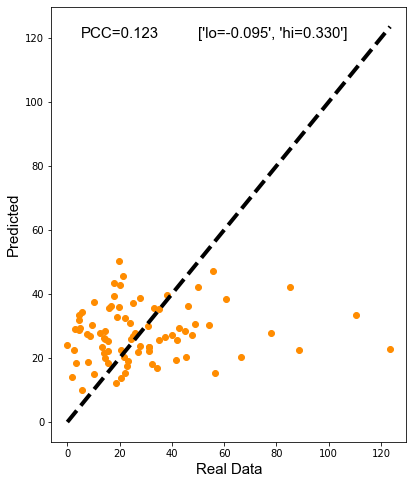

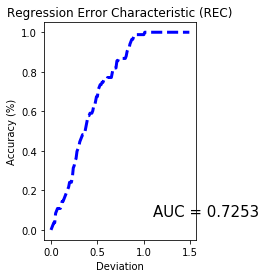

In [24]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
#RR = r2_score(y_val, y_predval)

def pearsonr_ci(y_val , y_predval, alpha=0.05):
    PCC, p = stats.pearsonr(y_val , y_predval)
    r_z = np.arctanh(PCC)
    se = 1/np.sqrt(len(y_val)-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return ('PCC=%0.3f'%PCC, 'lo=%0.3f'%lo, 'hi=%0.3f'%hi,'p=%0.3f'%p)

PCC, lo, hi, pearson = pearsonr_ci(y_val , y_predval, alpha=0.05)
CI = [lo,hi]

# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data", fontname="Arial", fontsize=15)
plt.ylabel("Predicted", fontname="Arial", fontsize=15)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(5, 120, PCC , fontname="Arial", fontsize=15)
plt.text(50, 120,CI, fontname="Arial", fontsize=15)
plt.savefig(r'C:\Users\U0033207PC\Desktop\LUAD FIREHOSE LEGACY DATABASE\PDF PLOT\RF\GBTR\GENES\VALIDATION_PCC_GENESGBTRRF.pdf')
plt.show()
#plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)
plt.savefig(r'C:\Users\U0033207PC\Desktop\LUAD FIREHOSE LEGACY DATABASE\PDF PLOT\RF\GBTR\GENES\VALIDATION_AUC_GENESGBTRRF.pdf')
plt.show()


In [25]:
y_val

array([  1.91,   4.96,  27.66,  10.09,  37.29,  25.  ,  24.97,  15.67,
        20.57,  47.77,  31.21,  25.99,  14.45,  13.44,  55.85,  35.18,
         9.36,  32.46,  18.63,  41.56,  77.79,  42.74,  27.14,  60.68,
        15.64,  21.45,  15.41,  23.78,  13.86,   4.37,  31.27,  49.8 ,
        33.28,  54.3 ,  45.3 ,   2.86,  88.57, 123.49,   2.43,  14.26,
        17.74,  35.22,  30.81,  19.74,  85.25,  24.21,   8.54,  20.57,
        27.76,  18.99,  22.01,  66.59,   3.19,  31.11,  38.01,   4.63,
        49.01,  19.58,  15.8 ,  22.14,  17.77,  12.32,   7.36,  41.79,
        14.29, 110.41,  13.99,   0.  ,  16.85,  44.91,   5.68,  20.27,
         5.72,  34.17,  10.18,  56.67,  45.99,  22.9 ,  39.91,   4.3 ,
        23.16,  21.81,   7.98])

In [26]:
y_predval

array([13.93046384, 29.24252313, 38.68965084, 15.15776812, 26.50498624,
       26.76139939, 37.14899911, 22.17192778, 22.5241592 , 27.25586057,
       22.08039051, 27.79341845, 20.02194936, 23.40018334, 47.28684793,
       35.37382832, 30.23152973, 18.19732522, 12.25348026, 19.47865376,
       27.93305746, 29.49013971, 21.76036505, 38.51545835, 25.22441408,
       45.51611483, 18.59040393, 30.7795452 , 26.127666  , 33.56454157,
       23.54852849, 42.30950672, 35.50927203, 30.21297464, 20.31998425,
       29.1687065 , 22.43597618, 22.69775714, 22.5606744 , 28.52992532,
       43.45880479, 25.49838386, 30.12349798, 35.93261826, 42.21793053,
       25.85869522, 26.93794497, 13.83314284, 23.81025012, 32.8002901 ,
       15.31669611, 20.46037311, 18.56991655, 23.52626336, 39.64178827,
       31.7533325 , 30.5573175 , 50.37642002, 35.48992928, 32.5759058 ,
       39.41472061, 27.9208364 , 27.42469224, 25.49295456, 25.89057596,
       33.45054871, 21.45560544, 24.21534434, 36.2861499 , 28.50

In [ ]:
###############################################Testing Set##############################################################


In [27]:
# Predicting the Test set results
y_pred = rgr_important.predict(X_important_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Print result of RELATIVE ROOT MEAN SQUARED ERROR (RRMSE)
def rmse_metric(y_test, y_pred):
    sum_error = 0.0
    for i in range(len(y_test)):
        prediction_error = y_pred[i] - y_test[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(y_test))
    return sqrt(mean_error)

rmse = rmse_metric(y_test, y_pred)

def meanactual_metric(y_test):
    sum_error = 0.0
    for i in range(len(y_test)):
        prediction_error = y_test[i]
        sum_error += prediction_error
        mean_error = sum_error / float(len(y_test))
    return (mean_error)

mean = meanactual_metric(y_test)
rrmse = rmse/mean
print(rrmse)

21.084479356423678
1232.8755962443215
35.1123282657861
1.095973179056283


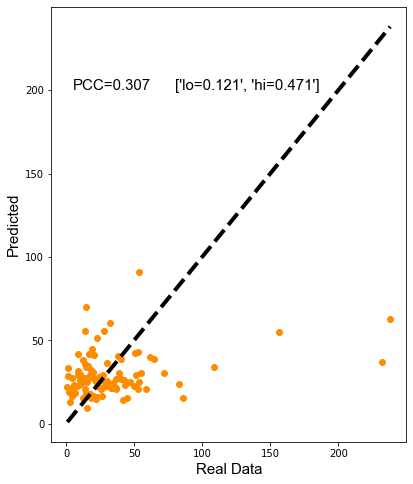

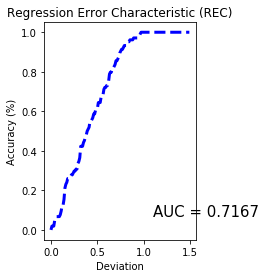

In [28]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_test , y_pred):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_test)):
            if np.linalg.norm(y_test[j] - y_pred[j]) / np.sqrt( np.linalg.norm(y_test[j]) **2 + np.linalg.norm(y_pred[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_test))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_test, y_pred)

# Calculating R^2 of the true and predicted values
#RR = r2_score(y_val, y_predval)

def pearsonr_ci(y_test , y_pred, alpha=0.05):
    PCC, p = stats.pearsonr(y_test , y_pred)
    r_z = np.arctanh(PCC)
    se = 1/np.sqrt(len(y_test)-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return ('PCC=%0.3f'%PCC, 'lo=%0.3f'%lo, 'hi=%0.3f'%hi,'p=%0.3f'%p)

PCC, lo, hi, pearson = pearsonr_ci(y_test , y_pred, alpha=0.05)
CI = [lo,hi]

# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred,color = "darkorange")
plt.xlabel("Real Data", fontname="Arial", fontsize=15)
plt.ylabel("Predicted", fontname="Arial", fontsize=15)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.text(5, 200, PCC , fontname="Arial", fontsize=15)
plt.text(80, 200,CI, fontname="Arial", fontsize=15)
plt.savefig(r'C:\Users\U0033207PC\Desktop\LUAD FIREHOSE LEGACY DATABASE\PDF PLOT\RF\GBTR\GENES\TESTING_PCC_GENESGBTRRF.pdf')
plt.show()
#plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)
plt.savefig(r'C:\Users\U0033207PC\Desktop\LUAD FIREHOSE LEGACY DATABASE\PDF PLOT\RF\GBTR\GENES\TESTING_AUC_GENESGBTRRF.pdf')
plt.show()

In [29]:
y_test

array([  5.06      ,  27.27      ,  19.48      ,  17.71      ,
        15.24      ,   2.99      ,  38.7       ,  58.41      ,
         4.07      ,  28.55      ,  20.17      ,  51.22      ,
        35.45      ,  40.37      ,  34.36      ,  18.3       ,
        72.24      ,   5.49      ,  14.03      ,  14.29      ,
         8.67      ,  36.63      ,  12.22      ,  32.06      ,
        14.59      ,  23.06      ,  44.58      ,  24.34      ,
         9.23      ,  21.98      ,  14.72      ,  16.52      ,
        53.29      ,   5.29      ,   4.57      ,  17.61      ,
        14.26      ,  36.76      ,  13.67      ,  18.56      ,
        19.81      ,   8.8       ,  52.56      ,  55.29      ,
        26.28      ,  13.93      ,  17.44      , 156.54      ,
        34.26      ,   8.48      ,  32.69      ,  29.79915354,
         8.21      ,  29.79915354,  38.47      ,  50.03      ,
        16.43      ,  18.99      , 238.11      ,  29.17      ,
         9.43      ,  53.12      ,  29.43      ,  15.7 

In [30]:
y_pred

array([20.79614549, 29.42411168, 15.85344615, 17.5360342 ,  9.57580111,
       13.05172215, 30.2909988 , 20.51741601, 27.13522507, 24.10355795,
       27.11020825, 29.01744655, 22.46859334, 26.46486716, 24.58316587,
       15.61558446, 30.35214415, 23.18951924, 27.51458483, 70.01972263,
       29.04843172, 20.56743533, 15.05690276, 60.17889896, 26.84236736,
       51.1096173 , 15.19073268, 27.74911466, 23.21787499, 14.99580555,
       17.99256222, 41.65037873, 90.94420047, 21.27614621, 16.29628192,
       16.86695862, 34.18833226, 26.79485295, 55.76932173, 32.1527353 ,
       31.22889098, 31.81496689, 20.77238197, 30.20936914, 16.48485234,
       21.01183091, 29.16711568, 55.06400329, 21.46276932, 41.91008993,
       21.59115684, 36.25592037, 22.42677145, 25.57681842, 40.3170274 ,
       22.26103201, 34.73036809, 41.96335661, 62.70626078, 22.75125151,
       30.00885696, 43.1022777 , 23.44895054, 24.95737175, 27.96913121,
       26.38962488, 25.11354765, 28.40115585, 22.68040154, 15.10